# Tumbling with Tornadoes: A Tornado Simulation Project
#### Jesus Olivera and Pujita Ravichandar

# Jesus' Section

## System Set-Up

In [ ]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import urllib
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
#--
# evaluate logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression





# To avoid display of warnings 
import warnings 
warnings.filterwarnings('ignore')

## Data Acquisition



#### Description
Homeland Infrastructure Foundation-Level Data (HIFLD): This dataset shows tornado tracks meassured using the Fujita Scale in the United States, from 1950 to 2015. 

![Fujita%20Scale.JPG](attachment:Fujita%20Scale.JPG)

#### Data Collection
The statistical data was obtained from the National Weather Service, Storm Prediction Center (SPC). Local weather forecast offices collect records of tornados and send it on a monthly basis to the NWS Performance Branch in Washington, DC. From there, the data go to the National Center for Enviromental Information, then to SPC. At SPC, the data is combined in segments from NCEI into whole-tornado paths by about March of each year, then uploaded to the previous year's files to the WCM page. 

#### Data Source
**The Historical Tornado Tracks data was collected via csv.**<br>
(https://hifld-geoplatform.opendata.arcgis.com/datasets/historical-tornado-tracks?geometry=127.221%2C16.969%2C4.350%2C61.605)

In [ ]:
# Importing the data from Github
filename = 'https://raw.githubusercontent.com/jaynuel/AIM-5001/master/Historical_Tornado_Tracks.csv'
data = pd.read_csv(filename)
df_raw = pd.DataFrame(data)

pd.set_option('display.max_columns', None)

# Variable "df" contains the dataframe
df_raw.head(2)

,FID,om,yr,mo,dy,date,time,tz,st,stf,stn,mag,inj,fat,loss,closs,slat,slon,elat,elon,len,wid,fc,Pre_1996_Loss,SHAPE_Length
0,1,1,1950,1,3,1/3/1950,11:00:00,3,MO,29,1,3,3,0,NaN,0.0,38.77,-90.22,38.83,-90.03,9.5,150,0,6,22821.104290
1,2,2,1950,1,3,1/3/1950,11:55:00,3,IL,17,2,3,3,0,NaN,0.0,39.10,-89.30,39.12,-89.23,3.6,130,0,5,8303.844476


## Data Preparation 



#### Approach:

The csv containing the data was uploaded into Github and later imported to this workbook for the analysis.<br>

**Dataset variables to be used in the analysis:**
- **yr**: Year, int
- **mo**: Month, int
- **dy**: Day, int
- **date**: Date, string
- **time**: Time, string
- **tz**: Time Zone, int
- **st**: State, string
- **mag**: Tornado Maginitude, int
- **inj**: Injured by Tornados, int
- **fat**: Fatalities by Tornados, int
- **loss**: Economic Loss in Millions, int
- **len**: Tornado Lenght in Miles, double presicion
- **wid**: Tornado Width in Feet, int


In [ ]:
# Creating dataframe with columns to be used in the analysis
df = df_raw[["yr","mo","dy","date","time","tz","st","mag","inj","fat","loss","len","wid"]]

In [ ]:
# Looking for null values
print('Null Values:')
print(df.isnull().sum())
print('')

# Shape of the data
print('Shape:',df.shape)

Null Values:
yr          0
mo          0
dy          0
date        0
time        0
tz          0
st          0
mag         0
inj         0
fat         0
loss    35431
len         0
wid         0
dtype: int64

Shape: (60114, 13)


## Exploratory Data Analysis

In [ ]:
#describe basic features of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60114 entries, 0 to 60113
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yr      60114 non-null  int64  
 1   mo      60114 non-null  int64  
 2   dy      60114 non-null  int64  
 3   date    60114 non-null  object 
 4   time    60114 non-null  object 
 5   tz      60114 non-null  int64  
 6   st      60114 non-null  object 
 7   mag     60114 non-null  int64  
 8   inj     60114 non-null  int64  
 9   fat     60114 non-null  int64  
 10  loss    24683 non-null  float64
 11  len     60114 non-null  float64
 12  wid     60114 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 6.0+ MB


In [ ]:
# Dataset statistical summary
df.describe().round(2)

,yr,mo,dy,tz,mag,inj,fat,loss,len,wid
count,60114.00,60114.00,60114.00,60114.00,60114.00,60114.00,60114.00,24683.00,60114.00,60114.00
mean,1987.97,5.97,15.88,3.00,0.80,1.56,0.10,1.29,3.48,98.45
std,17.79,2.39,8.74,0.08,0.91,19.18,1.55,31.54,8.52,195.73
min,1950.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1974.00,4.00,8.00,3.00,0.00,0.00,0.00,0.00,0.10,13.00
50%,1991.00,6.00,16.00,3.00,1.00,0.00,0.00,0.00,0.60,40.00
75%,2003.00,7.00,24.00,3.00,1.00,0.00,0.00,0.05,3.00,100.00
max,2015.00,12.00,31.00,9.00,5.00,1740.00,158.00,2800.10,234.70,4576.00


### Statistical Exploration

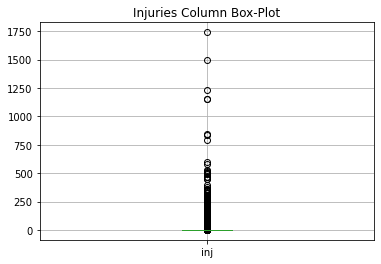

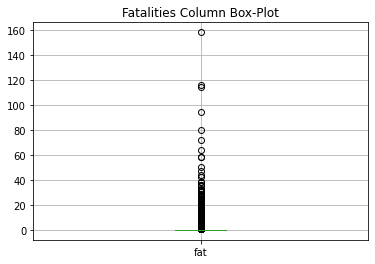

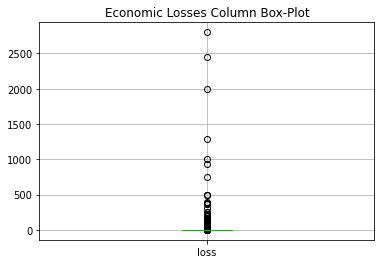

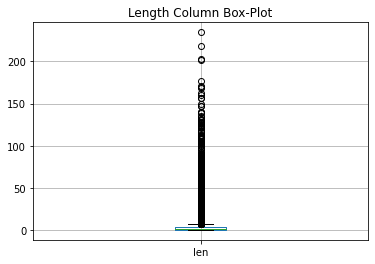

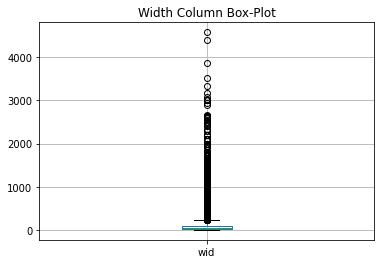

In [ ]:
# Ploting numerical data box-plots

# Injuries Box-plot Before removing outliers
df.boxplot(column=['inj'])
plt.title('Injuries Column Box-Plot')
plt.show()
print('')

# Fatalities Box-plot
df.boxplot(column=['fat'])
plt.title('Fatalities Column Box-Plot')
plt.show()
print('')


# Economic Loss Box-plot
loss_boxplot = df[['loss']].dropna()
loss_boxplot.boxplot(column=['loss'])
plt.title('Economic Losses Column Box-Plot')
plt.show()
print('')

# Length Box-plot
df.boxplot(column=['len'])
plt.title('Length Column Box-Plot')
plt.show()
print('')

# Width Box-plot
df.boxplot(column=['wid'])
plt.title('Width Column Box-Plot')
plt.show()
print('')

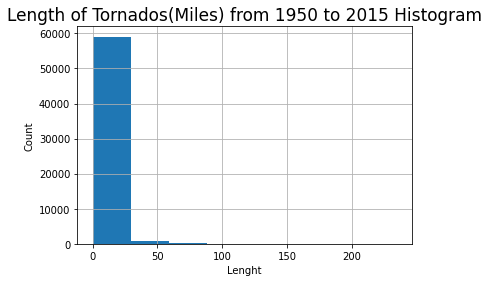

In [ ]:
# Ploting tornado length(in miles) histogram
df.hist(column='len', bins=8)
plt.xlabel('Lenght')
plt.ylabel('Count')
plt.title('Length of Tornados(Miles) from 1950 to 2015 Histogram', fontsize=17)
plt.show()

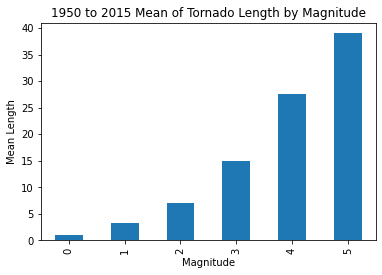

In [ ]:
# Ploting the mean of tornado lengths by magnitude

df.groupby(['mag']).len.agg(['mean']).plot(kind='bar').get_legend().remove()
plt.title('1950 to 2015 Mean of Tornado Length by Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Mean Length')
plt.show()

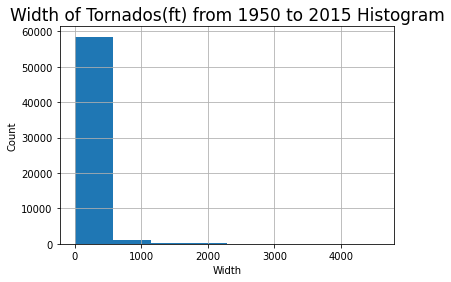

In [ ]:
# Ploting tornado width(in feet) histogram
df.hist(column='wid', bins=8)
plt.xlabel('Width')
plt.ylabel('Count')
plt.title('Width of Tornados(ft) from 1950 to 2015 Histogram', fontsize=17)
plt.show()

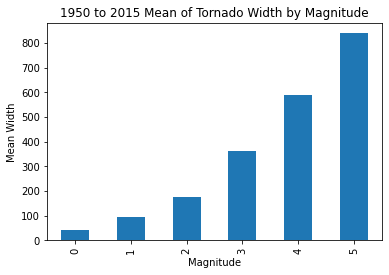

In [ ]:
# Ploting the mean of tornado widths by magnitude

# Plot
df.groupby(['mag']).wid.agg(['mean']).plot(kind='bar').get_legend().remove()
plt.title('1950 to 2015 Mean of Tornado Width by Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Mean Width')
plt.show()

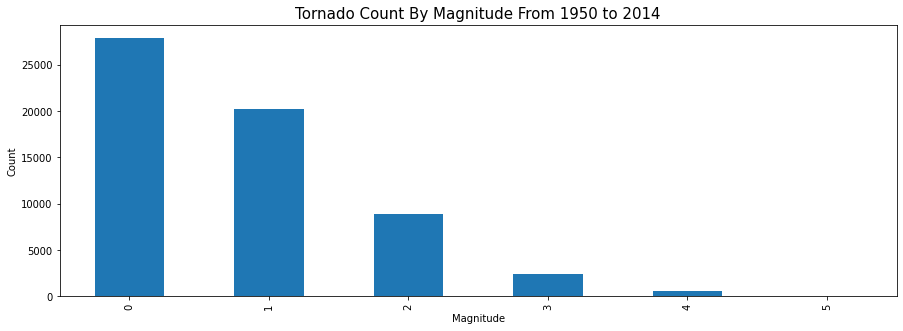

In [ ]:
# Total tornado records by magnitude 
tot_by_mag = df['mag'].value_counts().sort_values(ascending = False)

# Plot
plt.rcParams['figure.figsize'] = (15,5)
tot_by_mag.plot(kind='bar')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.title('Tornado Count By Magnitude From 1950 to 2014', fontsize=15)
plt.show()

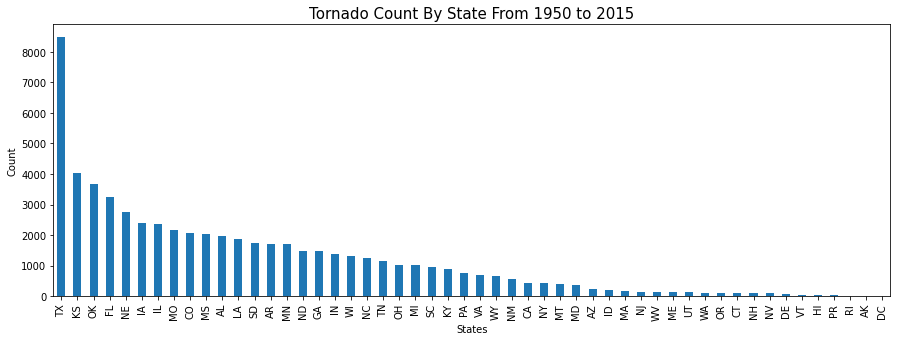

In [ ]:
# Understanding the distribution of the dataset per State
tot_by_st = df['st'].value_counts().sort_values(ascending= False)

# Plot
plt.rcParams['figure.figsize'] = (15,5)
tot_by_st.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Count')
plt.title('Tornado Count By State From 1950 to 2015', fontsize=15)
plt.show()

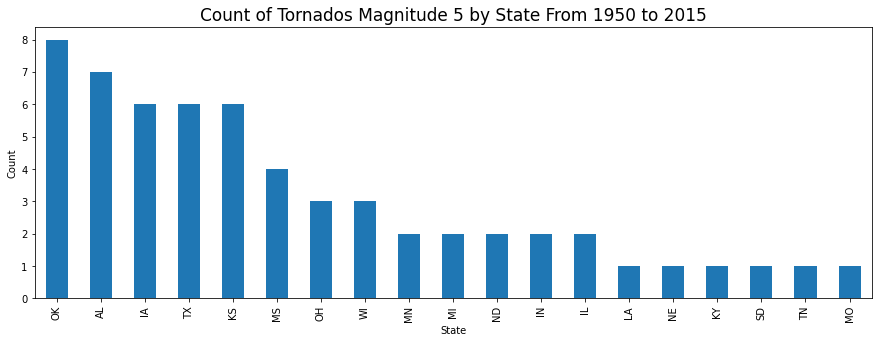

In [ ]:
# Ploting count of tornados with magnitude 5 per state
mag5 = df[["mag","st"]]

st_mag5 = mag5[(mag5.mag == 5)]

tot_mag5 = st_mag5.groupby(['st']).count().sort_values(by='mag', ascending=False)

# Plot
tot_mag5.plot(kind='bar').get_legend().remove()
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Count of Tornados Magnitude 5 by State From 1950 to 2015", fontsize=17)
plt.show()

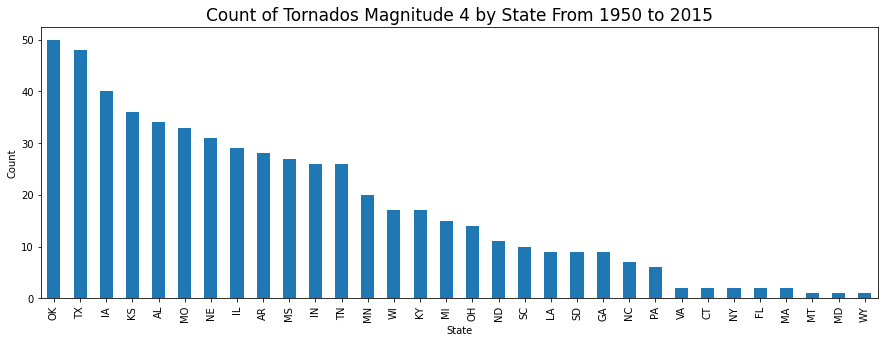

In [ ]:
# Ploting count of tornados magnitude 4 by state
mag4 = df[["mag","st"]]

st_mag4 = mag4[(mag4.mag == 4)]

tot_mag4 = st_mag4.groupby(['st']).count().sort_values(by='mag', ascending=False)

tot_mag4.plot(kind='bar').get_legend().remove()
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Count of Tornados Magnitude 4 by State From 1950 to 2015", fontsize=17)
plt.show()

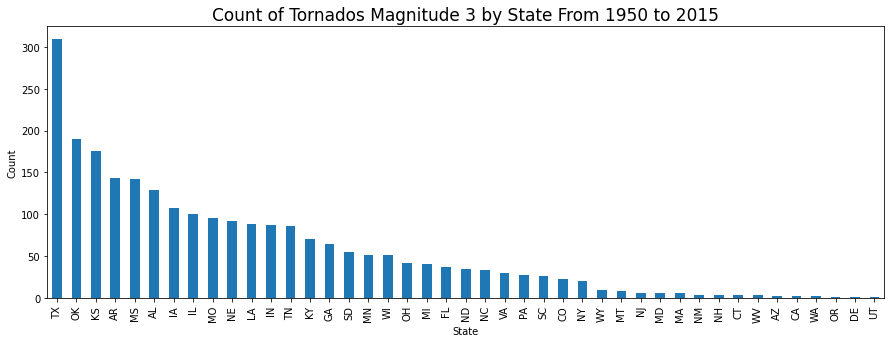

In [ ]:
# Ploting count of tornados magnitude 3 by state
mag3 = df[["mag","st"]]

st_mag3 = mag3[(mag3.mag == 3)]

tot_mag3 = st_mag3.groupby(['st']).count().sort_values(by='mag', ascending=False)

tot_mag3.plot(kind='bar').get_legend().remove()
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Count of Tornados Magnitude 3 by State From 1950 to 2015", fontsize=17)
plt.show()

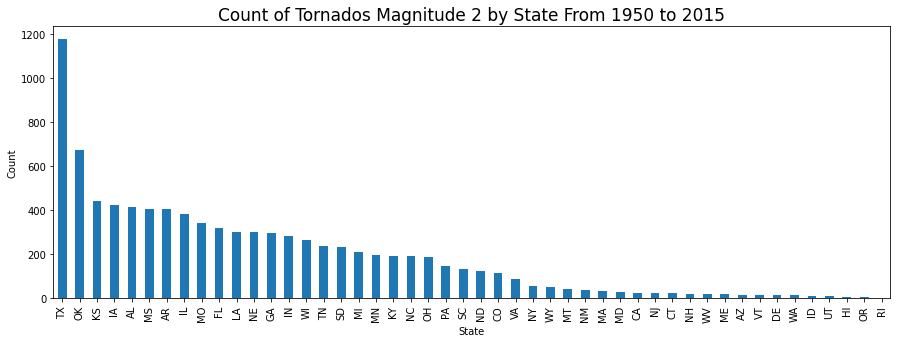

In [ ]:
# Ploting count of tornados magnitude 2 by state
mag2 = df[["mag","st"]]

st_mag2 = mag2[(mag2.mag == 2)]

tot_mag2 = st_mag2.groupby(['st']).count().sort_values(by='mag', ascending=False)

tot_mag2.plot(kind='bar').get_legend().remove()
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Count of Tornados Magnitude 2 by State From 1950 to 2015", fontsize=17)
plt.show()

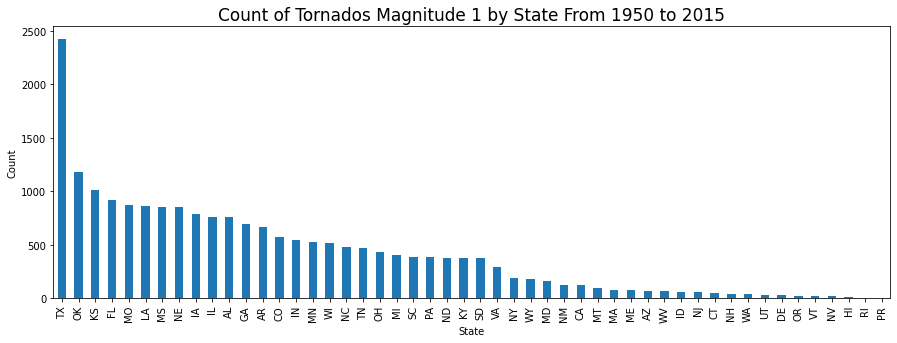

In [ ]:
# Ploting count of tornados magnitude 1 by state
mag1 = df[["mag","st"]]

st_mag1 = mag1[(mag1.mag == 1)]

tot_mag1 = st_mag1.groupby(['st']).count().sort_values(by='mag', ascending=False)

tot_mag1.plot(kind='bar').get_legend().remove()
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Count of Tornados Magnitude 1 by State From 1950 to 2015", fontsize=17)
plt.show()

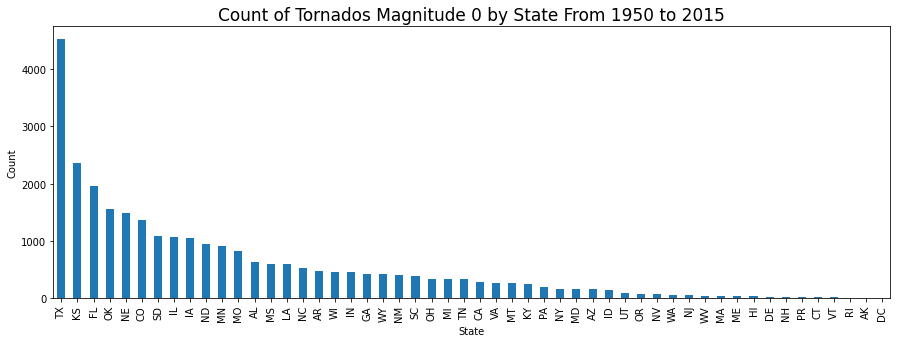

In [ ]:
# Ploting count of tornados magnitude 0 by state
mag0 = df[["mag","st"]]

st_mag0 = mag0[(mag0.mag == 0)]

tot_mag0 = st_mag0.groupby(['st']).count().sort_values(by='mag', ascending=False)

# Plot
tot_mag0.plot(kind='bar').get_legend().remove()
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Count of Tornados Magnitude 0 by State From 1950 to 2015", fontsize=17)
plt.show()

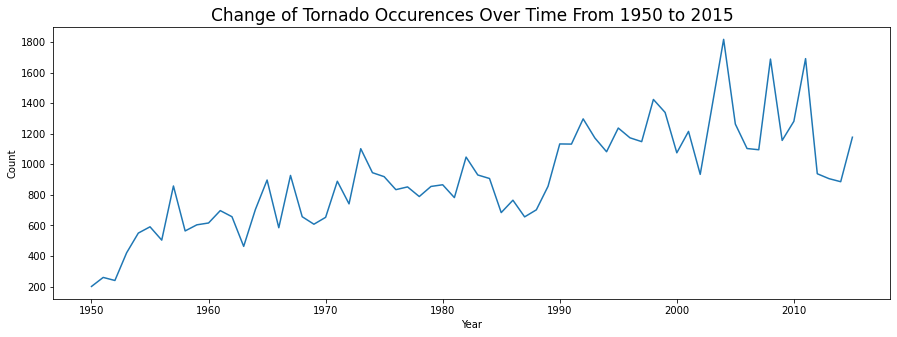

In [ ]:
# Ploting change of tornado occurances over time from 1950 to 2015
data1 = df[["yr","mag"]]
tot1 = data1.groupby(['yr']).count()

# Plot
tot1.plot.line(sharex=True, sharey=True).get_legend().remove()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Change of Tornado Occurences Over Time From 1950 to 2015', fontsize=17)
plt.show()

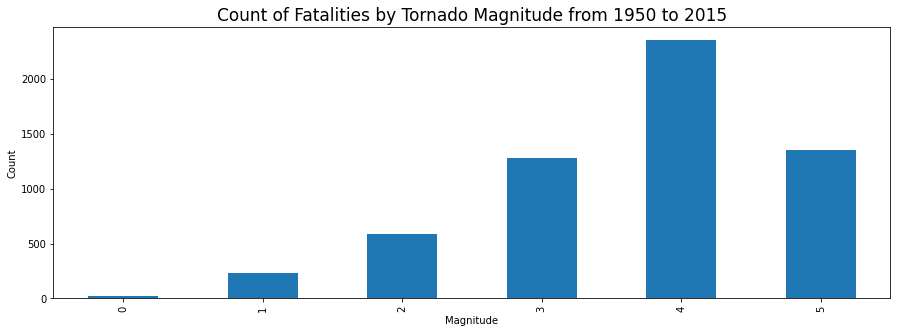

In [ ]:
# Ploting tornado magnitude and fatalities 
data = df[["mag","fat"]].dropna()

# Plot
tot_fat = data.groupby(['mag']).sum()
tot_fat.plot(kind='bar').get_legend().remove()
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.title('Count of Fatalities by Tornado Magnitude from 1950 to 2015', fontsize=17)
plt.show()

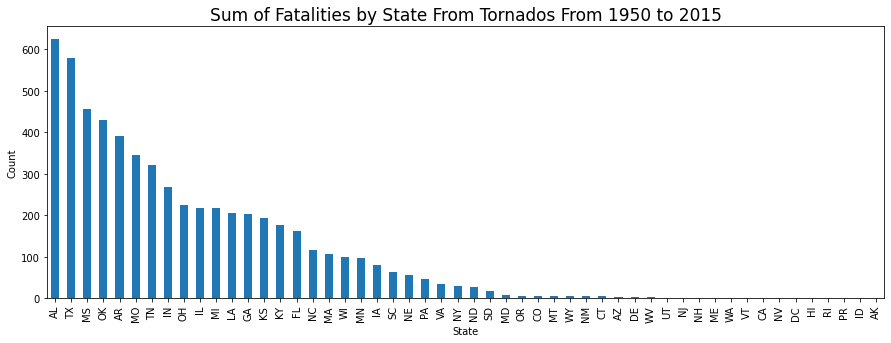

In [ ]:
# Ploting sum of fatalities by state
fat_st = df[['st','fat']].groupby('st').fat.agg(['sum']).sort_values(['sum'], ascending=False)



fat_st.plot(kind='bar').get_legend().remove()
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Sum of Fatalities by State From Tornados From 1950 to 2015", fontsize=17)
plt.show()


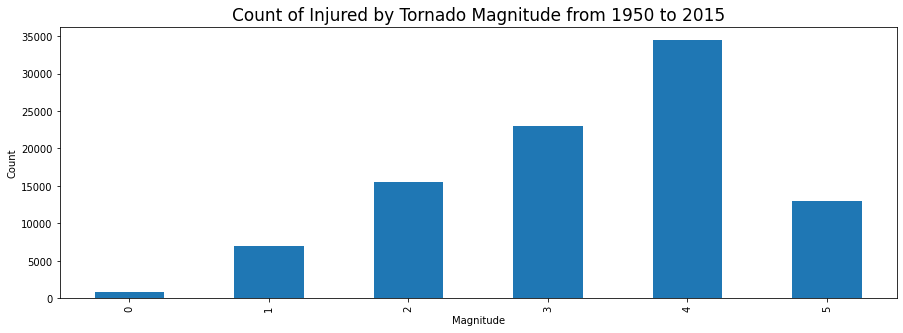

In [ ]:
# Ploting tornado magnitude and injureries 
data = df[["mag","inj"]].dropna()

# Plot
tot_inj = data.groupby(['mag']).sum()
tot_inj.plot(kind='bar').get_legend().remove()
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.title('Count of Injured by Tornado Magnitude from 1950 to 2015', fontsize=17)
plt.show()

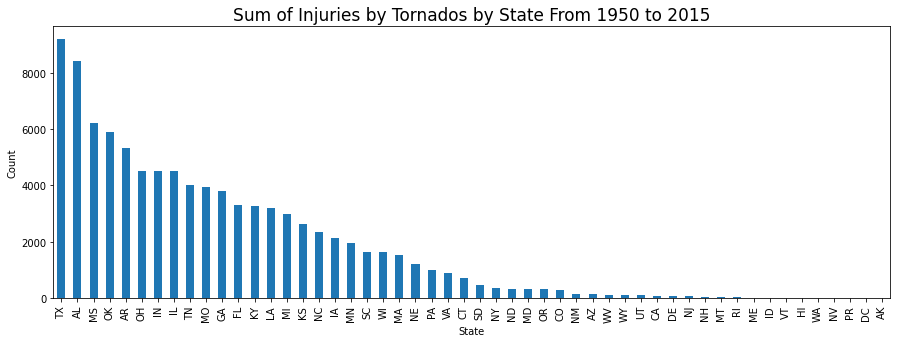

In [ ]:
# Ploting injured by tornados by state
inj_st = df[['st','inj']].groupby('st').inj.agg(['sum']).sort_values(['sum'], ascending=False)



inj_st.plot(kind='bar').get_legend().remove()
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Sum of Injuries by Tornados by State From 1950 to 2015", fontsize=17)
plt.show()


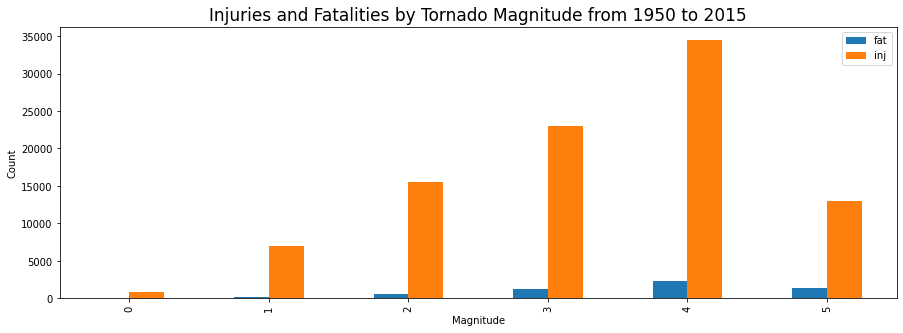

In [ ]:
# Ploting tornado injuries and fatalities by magintude from 1950 to 2015 
# in a side-by-side bar plot
data_mag_inj= df[["mag","fat","inj"]].dropna()

# Plot
data_mag_inj.groupby(['mag']).sum().plot.bar()
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.title('Injuries and Fatalities by Tornado Magnitude from 1950 to 2015', fontsize=17)
plt.show()

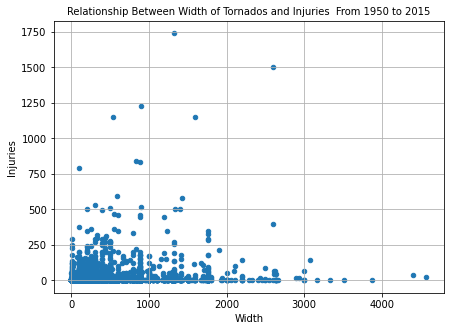

In [ ]:
# Ploting the relationship between Width of Tornados and injuries by tornado magnitude
data = df[["inj","fat","mag","wid","len"]]

# Plot
data.plot.scatter(x='wid', y='inj', figsize=(7,5), grid=True, sharex=False)
plt.xlabel('Width')
plt.ylabel('Injuries')
plt.title('Relationship Between Width of Tornados and Injuries  From 1950 to 2015', fontsize=10)
plt.show()

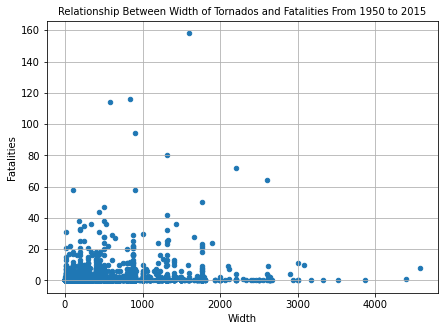

In [ ]:
# Ploting the relationship between Width of Tornados and fatalities by tornado magnitude
data = df[["inj","fat","mag","wid","len"]]

# Plot
data.plot.scatter(x='wid', y='fat', figsize=(7,5), grid=True, sharex=False)
plt.xlabel('Width')
plt.ylabel('Fatalities')
plt.title('Relationship Between Width of Tornados and Fatalities From 1950 to 2015', fontsize=10)
plt.show()

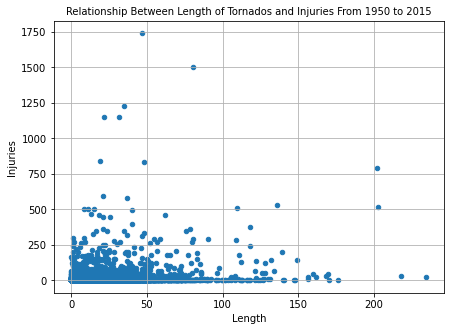

In [ ]:
# Ploting the relationship between Length of Tornados and injuries by tornado magnitude
data = df[["inj","fat","mag","wid","len"]]

# Plot
data.plot.scatter(x='len', y='inj', figsize=(7,5), grid=True, sharex=False)
plt.xlabel('Length')
plt.ylabel('Injuries')
plt.title('Relationship Between Length of Tornados and Injuries From 1950 to 2015', fontsize=10)
plt.show()

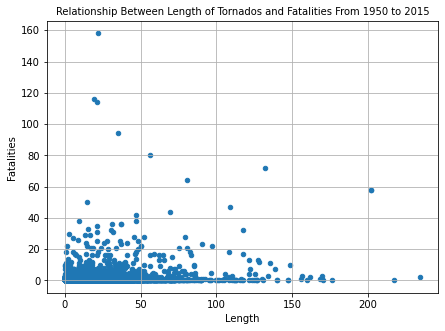

In [ ]:
# Ploting the relationship between Length of Tornados and fatalities by tornado magnitude
data = df[["inj","fat","mag","wid","len"]]

# Plot
data.plot.scatter(x='len', y='fat', figsize=(7,5), grid=True, sharex=False)
plt.xlabel('Length')
plt.ylabel('Fatalities')
plt.title('Relationship Between Length of Tornados and Fatalities From 1950 to 2015', fontsize=10)
plt.show()

In [ ]:
# Understanding the occurances of tornados by time of the day 

# "data_am" contains records during am
data_am = df[(df.time >= '00:00:00' )& (df.time <= '11:59:00')]

# "data_pm" contains records during pm
data_pm = df[(df.time >= '12:00:00')&(df.time <= '23:59:00')]

# Printing count of tornados in the dataset by am and pm 
print('Count of Tornados during the am:',data_am.mag.count()) 
print('')
print('Count of Tornados during the pm:', data_pm.mag.count())

Count of Tornados during the am: 3475

Count of Tornados during the pm: 51043


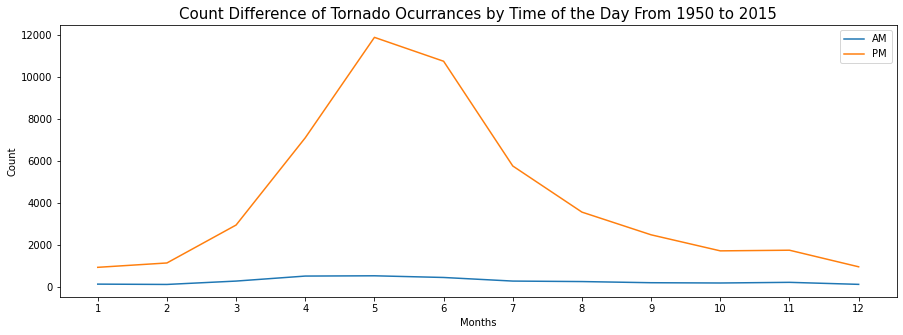

In [ ]:
# Ploting the count difference of tornado occurances by am and pm

df_am = data_am[['mo','mag']]
df_pm = data_pm[['mo','mag']]


ax = df_am.groupby('mo').agg(['count']).plot()
df_pm.groupby('mo').agg(['count']).plot(ax=ax)

plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Count Difference of Tornado Ocurrances by Time of the Day From 1950 to 2015', fontsize=15)
l = plt.legend()
l.get_texts()[0].set_text('AM')
l.get_texts()[1].set_text('PM')

months = (1,2,3,4,5,6,7,8,9,10,11,12)
plt.xticks(months)


plt.show()

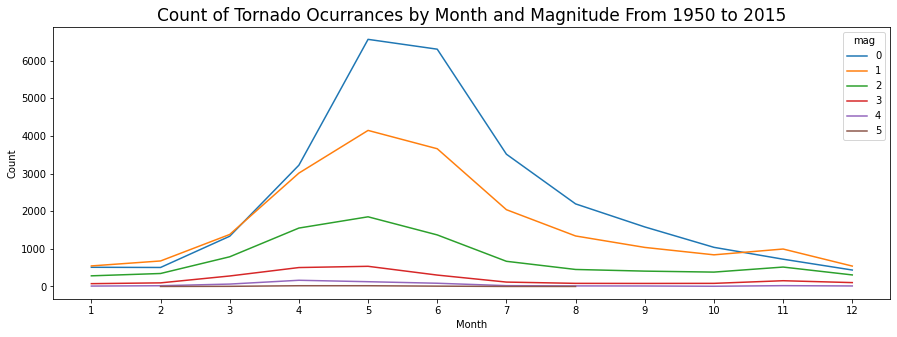

In [ ]:
# Ploting tornado occurances by month and magnitude

df_mo_mag = df[['mo','mag']]

# Plot
df_mo_mag.groupby(['mo','mag']).size().unstack().round().plot()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Tornado Ocurrances by Month and Magnitude From 1950 to 2015', fontsize=17)
months = (1,2,3,4,5,6,7,8,9,10,11,12)
plt.xticks(months)
plt.show()

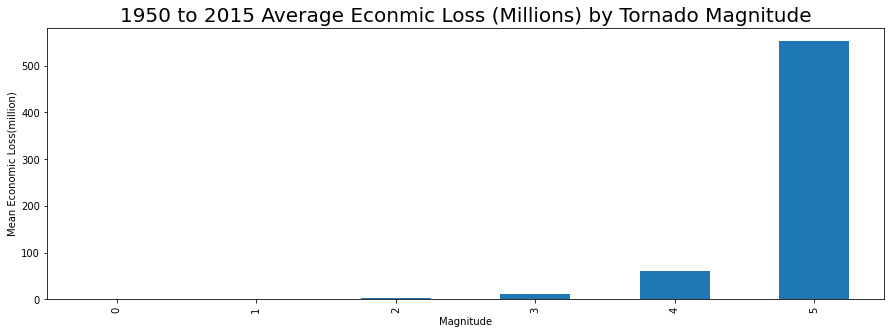

In [ ]:
# Ploting relationship between economic losses and tornado magnitude

# Filterning dataframe and dropping null values
mag_loss = df[['mag','loss']].dropna()

# Plot
mag_loss.groupby(['mag']).loss.agg(['mean']).plot(kind='bar').get_legend().remove()
plt.title('1950 to 2015 Average Econmic Loss (Millions) by Tornado Magnitude', fontsize= 20)
plt.xlabel('Magnitude')
plt.ylabel('Mean Economic Loss(million)')
plt.show()


### Understanding the Outliers

In [ ]:
# Length outlier
df[df.len > 234].head().T

,763
yr,1953
mo,3
dy,22
date,3/22/1953
time,15:00:00
tz,3
st,LA
mag,2
inj,22
fat,2


#### Source: Wikipedia

#### URL: https://en.wikipedia.org/wiki/Tornadoes_of_1953
<br>
"An outbreak of 10 tornadoes struck the Midwest and the Mississippi Valley. On March 21, a large F3 tornado moved through Bancroft, Iowa, although there were no casualties. This was not the case in Minnesota, where a brief but strong F2 tornado killed one and injured three east-northeast of St. Cloud. The next day, an extremely long-tracked F2 tornado traveled 234.7 miles through Louisiana and Mississippi (although this was more than likely a tornado family rather than just a single tornado). The tornado passed near the cities of Alexandria, Louisiana, Vicksburg, Mississippi, and Greenville, Mississippi, killing two people and injuring 22 others. Overall, the tornadoes killed three and injured 28."

In [ ]:
# Width Outlier
df[df.wid >= 4576].head().T

,57600
yr,2013
mo,5
dy,31
date,5/31/2013
time,17:03:00
tz,3
st,OK
mag,3
inj,26
fat,8


#### Source: Wikipedia

#### URL: https://en.wikipedia.org/wiki/2013_El_Reno_tornado
<br>
"During the early evening of Friday, May 31, 2013, a very large and powerful tornado[a] occurred over rural areas of Central Oklahoma. This rain-wrapped, multiple-vortex tornado was the widest tornado ever recorded and was part of a larger weather system that produced dozens of tornadoes over the preceding days. The tornado initially touched down at 6:03 p.m. Central Daylight Time (2303 UTC) about 8.3 miles (13.4 km) west-southwest of El Reno, rapidly growing in size and becoming more violent as it tracked through central portions of Canadian County. Remaining over mostly open terrain, the tornado did not impact many structures; however, measurements from mobile weather radars revealed extreme winds up to 302 mph (486 km/h) within the vortex; these are the highest observed wind speeds on Earth, ahead of the 1999 Bridge Creek–Moore tornado with slightly higher wind speeds."

In [ ]:
# Injuries outlier
df[df.inj >= 1740].head().T

,19451
yr,1979
mo,4
dy,10
date,4/10/1979
time,17:50:00
tz,3
st,TX
mag,4
inj,1740
fat,42


#### Source: Wikipedia

#### URL: https://en.wikipedia.org/wiki/1979_Red_River_Valley_tornado_outbreak
<br>
"The 1979 Red River Valley tornado outbreak was a tornado event that occurred on April 10, 1979, near the Red River Valley. It is noted for the F4 tornado that hit Wichita Falls, Texas, and is commonly referred to as "Terrible Tuesday" by many meteorologists. Additional tornadoes were reported across the Southern Plains as well as in the Mississippi River Valley on April 10–11, 1979. At the end of the outbreak, 54 people lost their lives in Texas, three were killed in Oklahoma and one was killed in Indiana. The Wichita Falls tornado alone killed 42 people and caused four hundred million in damage ($1.82 billion in today's dollars). The tornado cut a path 8 miles (13 km) through the city, with significant devastation."

In [ ]:
# Fatalities and Economic Loss outlier
df[df.fat >= 158].head().T

,55524
yr,2011
mo,5
dy,22
date,5/22/2011
time,16:34:00
tz,3
st,MO
mag,5
inj,1150
fat,158


#### Source: Wikipedia

#### URL: https://en.wikipedia.org/wiki/2011_Joplin_tornado
<br>
"The 2011 Joplin tornado was a devastating EF5-rated multiple-vortex tornado that struck Joplin, Missouri, United States, on the evening of Sunday, May 22, 2011. It was part of a larger late-May tornado outbreak and reached a maximum width of nearly one mile (1.6 km) during its path through the southern part of the city. This tornado was unusual in that it intensified in strength and grew larger in size at a very fast rate. The tornado tracked eastward across the city, and then continued eastward across Interstate 44 into rural portions of Jasper and Newton counties. It was the third tornado to strike Joplin since May 1971. Overall, the tornado killed 158 people (with an additional eight indirect deaths), injured some 1,150 others, and caused damages amounting to a total of 2.8 billion. It was the deadliest tornado to strike the U.S. since the 1947 Glazier–Higgins–Woodward tornadoes, and the seventh-deadliest overall."

## Logistic Regression

### Correlation Matrix

In [ ]:
# Creating dataframe with numerical features 
correlation = df[['wid','len','fat','inj','loss','mag']].dropna()

# Converting feet(wid) to miles 
ft_mile = correlation['wid']*0.000189394
ft_mile.head()

35431    0.006629
35432    0.009470
35433    0.009470
35434    0.007576
35435    0.001894
Name: wid, dtype: float64

In [ ]:
# Concatinating, dropping old wid value and reindexing dataframe
cor = pd.concat([correlation, ft_mile.reindex(correlation.index)], axis=1).iloc[: , 1:]

cor_1 = cor.reset_index(drop=True)

# Updating the order of the columns in the dataframe
cor_updated = cor_1[['len','wid','fat','inj','loss','mag']]

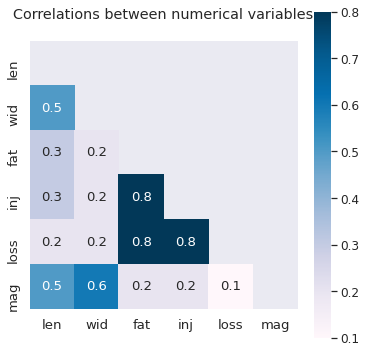

In [ ]:
# Heatmap showing correlation between numerical variables:
# Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html 

mask = np.zeros_like(cor_updated.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot 
sns.set(font_scale=1.2)
plt.figure(figsize=(6,6))
plt.title("Correlations between numerical variables\n")
sns.set(font_scale=1.1)
sns.heatmap(cor_updated.corr().round(1), cmap='PuBu', square=True, annot=True, mask=mask)

plt.show()

**Strong Correlation**
As shown in the heat map above there is a strong positive correlation between injuries and fatalites, and between injuries and losses. 

**Moderate Correlation**
As shown in the heat map above there is a moderate positive correlation between length and magnitude, between width and magnitude, and length and width.

**Weak Correlation**
All the other numerical variables appear to have a weak positive correlation among each other. 

### Logistic Regression

For this Logistic regression we will be predicting tornado magnitude based of tornado widths and lengths.

**Standarization**

In [ ]:
# Reference:https://realpython.com/logistic-regression-python/

X = cor_updated[['wid','len']]
y = cor_updated[['mag']]


num = ['wid','len']

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X[num]), columns=num)

X.head(2)

,wid,len
0,-0.393455,-0.41716
1,-0.323816,-0.41716


In [ ]:
#splitting the data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size =0.3, 
                                                stratify=y, random_state=0)

In [ ]:
# Fiting the model to determine coefficients
model = LogisticRegression().fit(Xtrain ,ytrain)

yhat = model.predict_proba(Xtest)

yhat

array([[8.22584601e-01, 1.55193946e-01, 1.99250276e-02, 2.07959792e-03,
        2.08132725e-04, 8.69548355e-06],
       [5.00493203e-01, 4.03290291e-01, 8.32837003e-02, 1.15476568e-02,
        1.32634797e-03, 5.88008126e-05],
       [7.98121081e-01, 1.75267161e-01, 2.37740304e-02, 2.56561750e-03,
        2.61140763e-04, 1.09692336e-05],
       ...,
       [6.52298138e-01, 2.96936963e-01, 4.50781995e-02, 5.13524450e-03,
        5.28157596e-04, 2.32965778e-05],
       [6.22442863e-01, 3.19318044e-01, 5.14787082e-02, 6.09216564e-03,
        6.39943444e-04, 2.82756706e-05],
       [3.90811100e-01, 4.84391467e-01, 1.07481935e-01, 1.54445993e-02,
        1.78931543e-03, 8.15834102e-05]])

In [ ]:
# Coefficients
print('Coefficients: \n', model.coef_)
print('')
# Intercept
print('Intercept: \n', model.intercept_)

Coefficients: 
 [[-2.57313847 -1.46278225]
 [-0.1385581  -0.2713217 ]
 [ 0.38076888  0.16014432]
 [ 0.66211425  0.42230877]
 [ 0.76363252  0.55460955]
 [ 0.90518092  0.59704131]]

Intercept: 
 [ 3.55036654  3.37060749  1.68898237 -0.36119021 -2.57589273 -5.67287344]


In [ ]:
# Meassuring accuracy of the model
model.score(Xtrain,ytrain).round(3)

0.697

In [ ]:
# Model clasification report

print(classification_report(ytest, model.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.75      0.94      0.84      4541
           1       0.51      0.37      0.43      2060
           2       0.32      0.11      0.16       590
           3       0.47      0.19      0.27       172
           4       0.33      0.05      0.09        38
           5       0.00      0.00      0.00         4

    accuracy                           0.69      7405
   macro avg       0.40      0.28      0.30      7405
weighted avg       0.64      0.69      0.65      7405



<Figure size 504x360 with 0 Axes>

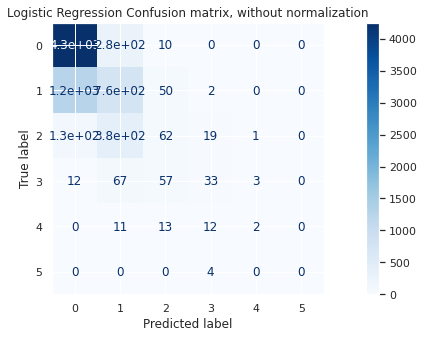

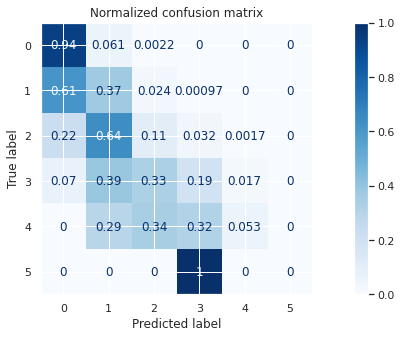

In [ ]:
# Plotting confusion matrix Logistic Regression 

# labels
class_names = [0,1,2,3,4,5]

# font and figure size
sns.set(font_scale=1)
plt.figure(figsize=(7,5))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Logistic Regression Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, Xtest, ytest,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()


## Random Forest

### Random Forest Model

In [ ]:
random_forest = RandomForestClassifier()

accuracy = np.mean(cross_val_score(random_forest, Xtrain, ytrain, cv=5))

print('Accuracy of train data Random Forest with Default Parameters:', accuracy.round(4))

Accuracy of train data Random Forest with Default Parameters: 0.67


In [ ]:
random_forest.fit(Xtrain, ytrain)

yhat1= random_forest.predict(Xtest)

accuracy = accuracy_score(ytest, yhat1)

print('Accuracy of test data Random Forest with default parameters:', accuracy.round(4))

Accuracy of test data Random Forest with default parameters: 0.6744


In [ ]:
# Model clasification report

print(classification_report(ytest, random_forest.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      4541
           1       0.49      0.44      0.47      2060
           2       0.30      0.21      0.25       590
           3       0.28      0.22      0.24       172
           4       0.13      0.08      0.10        38
           5       0.33      0.25      0.29         4

    accuracy                           0.67      7405
   macro avg       0.39      0.34      0.36      7405
weighted avg       0.65      0.67      0.66      7405



### Random Forest Model 2: Optimizing the Model

In [ ]:
random_forest2 = RandomForestClassifier(criterion='gini', max_depth=7, max_features=0.7, 
                                        min_samples_leaf=1,min_samples_split=5, 
                                        n_estimators=24, random_state=0)

In [ ]:
random_forest2.fit(Xtrain, ytrain)

yhat2 = random_forest2.predict(Xtest)

accuracy_rf2 = accuracy_score(ytest, yhat2)

print('Accuracy of test data Random Forest with updated parameters:', accuracy_rf2.round(3))

Accuracy of test data Random Forest with updated parameters: 0.707


In [ ]:
# Model clasification report

print(classification_report(ytest, random_forest2.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      4541
           1       0.52      0.53      0.52      2060
           2       0.34      0.09      0.14       590
           3       0.52      0.19      0.28       172
           4       0.33      0.05      0.09        38
           5       0.00      0.00      0.00         4

    accuracy                           0.71      7405
   macro avg       0.42      0.29      0.31      7405
weighted avg       0.67      0.71      0.68      7405



### Confusion Matrix for Random Forest Model 2

<Figure size 504x360 with 0 Axes>

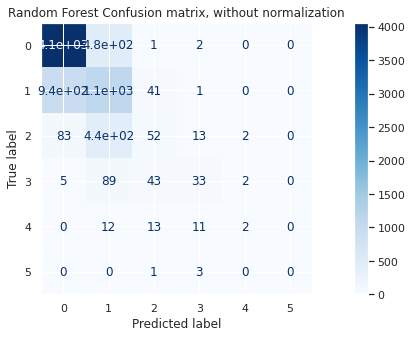

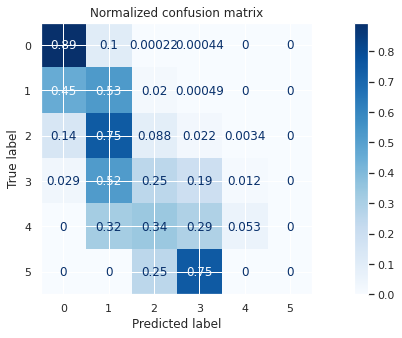

In [ ]:
# Plotting confusion matrix best Random Forest

# labels
class_names = [0,1,2,3,4,5]

# font and figure size
sns.set(font_scale=1)
plt.figure(figsize=(7,5))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Random Forest Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(random_forest2, Xtest, ytest,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()


Confusion Matrix:
- As shown on the confusion matrix above majority of tornados with magnitude 0 were accurretly predicted.
- The tornados with magnitude 1 to 5 are not predicted strongly and will more likely be predicted as a lower magnitude.
- Upsampling more tornado magnitudes could help imporove the predictions on all.


#Puji's Section

## Dataset Up

In [ ]:
import requests
from bs4 import BeautifulSoup
import urllib
# Link to all the csv files:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

link = "https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/"
response = requests.get(link)
html = response.text



In [ ]:
# Making a soup out of the html and creating the list of file names:
soup = BeautifulSoup(html)
elements = soup.findAll("a",{"class":""})

In [ ]:
StormEventLocations.head(2)

,YEARMONTH,EPISODE_ID,EVENT_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,197206,990000001,990000001,1,NaN,NaN,LABELLE,26.77,-81.48,2677.0,-8148.0
1,197206,990000001,990000001,2,NaN,NaN,LABELLE,26.78,-81.48,2678.0,-8148.0


## Pulling Data From Github .csv

In [ ]:
details = df
details.head()

,yr,mo,dy,date,time,tz,st,mag,inj,fat,loss,len,wid
0,1950,1,3,1/3/1950,11:00:00,3,MO,3,3,0,NaN,9.5,150
1,1950,1,3,1/3/1950,11:55:00,3,IL,3,3,0,NaN,3.6,130
2,1950,1,3,1/3/1950,16:00:00,3,OH,1,1,0,NaN,0.1,10
3,1950,1,13,1/13/1950,5:25:00,3,AR,3,1,1,NaN,0.6,17
4,1950,1,25,1/25/1950,19:30:00,3,MO,2,5,0,NaN,2.3,300


In [ ]:
details = details.rename(columns = {"mag":"TOR_F_SCALE", "wid":"TOR_WIDTH"})

In [ ]:
details.head()

,yr,mo,dy,date,time,tz,st,TOR_F_SCALE,inj,fat,loss,len,TOR_WIDTH
0,1950,1,3,1/3/1950,11:00:00,3,MO,3,3,0,NaN,9.5,150
1,1950,1,3,1/3/1950,11:55:00,3,IL,3,3,0,NaN,3.6,130
2,1950,1,3,1/3/1950,16:00:00,3,OH,1,1,0,NaN,0.1,10
3,1950,1,13,1/13/1950,5:25:00,3,AR,3,1,1,NaN,0.6,17
4,1950,1,25,1/25/1950,19:30:00,3,MO,2,5,0,NaN,2.3,300


## Simulation Time!

### Exploring F-Scale Values

In [ ]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60114 entries, 0 to 60113
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           60114 non-null  int64  
 1   mo           60114 non-null  int64  
 2   dy           60114 non-null  int64  
 3   date         60114 non-null  object 
 4   time         60114 non-null  object 
 5   tz           60114 non-null  int64  
 6   st           60114 non-null  object 
 7   TOR_F_SCALE  60114 non-null  int64  
 8   inj          60114 non-null  int64  
 9   fat          60114 non-null  int64  
 10  loss         24683 non-null  float64
 11  len          60114 non-null  float64
 12  TOR_WIDTH    60114 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 6.0+ MB


In [ ]:
details['TOR_WIDTH'].head()
#note: tornado widths are in feet

0    150
1    130
2     10
3     17
4    300
Name: TOR_WIDTH, dtype: int64

**F-scale Ranges (mph)**

F0: < 73

F1: 73 - 112

F2: 113 - 157

F3: 158 - 206

F4: 207 - 260

F5: > 261

## Inside Tornado


## F0 Tornadoes

### F0 Simulation

In [ ]:
#change width to miles using conversion factor 1 mi = 5280 ft
w_mi = details['TOR_WIDTH']/5280
w_mi

0        0.028409
1        0.024621
2        0.001894
3        0.003220
4        0.056818
           ...   
60109    0.028409
60110    0.007576
60111    0.018939
60112    0.014205
60113    0.014205
Name: TOR_WIDTH, Length: 60114, dtype: float64

In [ ]:
#velocity ranges for F0

f0 = []

for i in range(0,73,10):
    f0.append(i)
    
f0 = np.array(f0)

print(f0)

[ 0 10 20 30 40 50 60 70]


In [ ]:
#Radius ranges for F0 in miles

rf0 = np.arange(0.1, 0.866667, 0.1)

print(rf0)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]


In [ ]:
#radius ranges for width

#find distribution of widths for F0 tornadoes

details['TOR_F_SCALE'].dropna()

# test = plt.hist(d[d["TOR_F_SCALE"]] > 'F0')

f0mag = details[(details.TOR_F_SCALE == 0)&(details.TOR_WIDTH < 73)]
f0mag.head()

,yr,mo,dy,date,time,tz,st,TOR_F_SCALE,inj,fat,loss,len,TOR_WIDTH
31,1950,3,19,3/19/1950,13:15:00,3,LA,0,0,0,NaN,18.1,27
110,1950,5,18,5/18/1950,19:00:00,3,KS,0,0,0,NaN,0.1,10
111,1950,5,19,5/19/1950,1:30:00,3,KS,0,0,0,NaN,0.1,10
144,1950,6,22,6/22/1950,21:00:00,3,NE,0,0,0,NaN,1.9,10
145,1950,6,25,6/25/1950,18:45:00,3,KS,0,0,0,NaN,0.1,10


In [ ]:
#calculate the angular velocity

f0_array = []

for i in rf0:
    loop_list = []
    for j in f0:
        x = j/i
        loop_list.append(x)
    f0_array.append(loop_list)
    
print(f0_array)

f0_df = pd.DataFrame(f0_array)

[[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0], [0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0], [0.0, 33.33333333333333, 66.66666666666666, 99.99999999999999, 133.33333333333331, 166.66666666666663, 199.99999999999997, 233.3333333333333], [0.0, 25.0, 50.0, 75.0, 100.0, 125.0, 150.0, 175.0], [0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0], [0.0, 16.666666666666668, 33.333333333333336, 50.0, 66.66666666666667, 83.33333333333334, 100.0, 116.66666666666667], [0.0, 14.285714285714285, 28.57142857142857, 42.857142857142854, 57.14285714285714, 71.42857142857142, 85.71428571428571, 99.99999999999999], [0.0, 12.5, 25.0, 37.5, 50.0, 62.5, 75.0, 87.5]]


In [ ]:
f0rad_values = []

for i in range(8):
    rad_list = []
    for j in range(8):
        rad_list.append(rf0[j])
    f0rad_values.append(rad_list)
    
print(f0rad_values)

[[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8], [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8], [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8], [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8], [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8], [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8], [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8], [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8]]


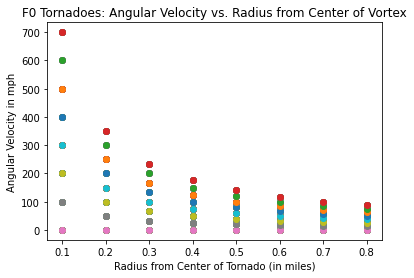

In [ ]:
plt.figure()
for j in rf0:
    for i in range(8):
        plt.scatter(f0rad_values[i], f0_df[i])
plt.xlabel('Radius from Center of Tornado (in miles)')
plt.ylabel('Angular Velocity in mph')
plt.title('F0 Tornadoes: Angular Velocity vs. Radius from Center of Vortex')
plt.show()

### F0 Probaility Density Function

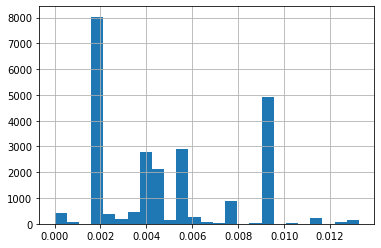

In [ ]:
f0rad_mi = f0mag['TOR_WIDTH']/5280
f0rad_mi.hist(bins=25)

In [ ]:
f0rad_count = pd.cut(f0rad_mi, bins=10, include_lowest = True, ordered = True).value_counts()
f0rad_count = f0rad_count.reindex(f0rad_count.index.categories)
f0rad_count.reindex(f0rad_count.index)

(-0.0010133, 0.00133]     485
(0.00133, 0.00265]       8425
(0.00265, 0.00398]       3413
(0.00398, 0.0053]        2274
(0.0053, 0.00663]        3243
(0.00663, 0.00795]        901
(0.00795, 0.00928]         17
(0.00928, 0.0106]        4957
(0.0106, 0.0119]          231
(0.0119, 0.0133]          186
Name: TOR_WIDTH, dtype: int64

In [ ]:
f0rad_prob = f0rad_count/17810
f0rad_prob

(-0.0010133, 0.00133]    0.027232
(0.00133, 0.00265]       0.473049
(0.00265, 0.00398]       0.191634
(0.00398, 0.0053]        0.127681
(0.0053, 0.00663]        0.182089
(0.00663, 0.00795]       0.050590
(0.00795, 0.00928]       0.000955
(0.00928, 0.0106]        0.278327
(0.0106, 0.0119]         0.012970
(0.0119, 0.0133]         0.010444
Name: TOR_WIDTH, dtype: float64

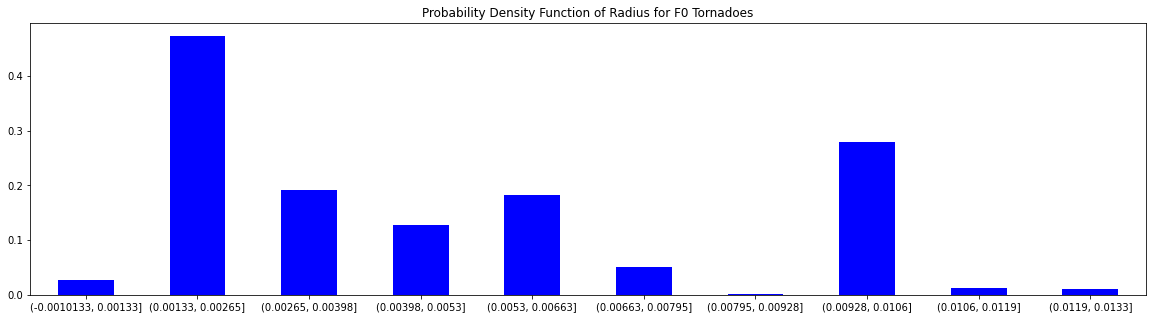

In [ ]:
ax0 = f0rad_prob.plot.bar(rot=0, color="b", figsize=(20,5))
plt.title('Probability Density Function of Radius for F0 Tornadoes')
plt.show()

In [ ]:
# calculate parameters
sample_mean = np.mean(f0rad_prob)
sample_std = np.std(f0rad_prob)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))

Mean=0.135, Standard Deviation=0.144


In [ ]:
f0_lob=(0.00000, 0.00133, 0.00265, 0.00398, 0.0053, 0.00663, 0.00795,0.00928, 0.0106, 0.0119)
f0_upb=(0.00133, 0.00265, 0.00398, 0.0053, 0.00663, 0.00795,0.00928, 0.0106, 0.0119, 0.0133)

f0range = []
f0rad_sim = []

for x in range(50):
  i = np.random.choice(np.arange(0,10), p=[0.047445, 0.209994, 0.153453, 0.103706, 0.260977, 0.034307, 0.000674, 0.174509, 0.008478, 0.006457])
  f0rad_sim.append(random.uniform(f0_lob[i], f0_upb[i]))

f0rad_sim = np.array(f0rad_sim)
print(f0rad_sim)

NameError: ignored

### F0 Probabilistic Simulation

In [ ]:
#velocity ranges for F0

f0_sim = []

for i in np.arange(0,73,1.46):
    f0_sim.append(i)
    
f0_sim = np.array(f0_sim)

print(f0_sim)

[ 0.    1.46  2.92  4.38  5.84  7.3   8.76 10.22 11.68 13.14 14.6  16.06
 17.52 18.98 20.44 21.9  23.36 24.82 26.28 27.74 29.2  30.66 32.12 33.58
 35.04 36.5  37.96 39.42 40.88 42.34 43.8  45.26 46.72 48.18 49.64 51.1
 52.56 54.02 55.48 56.94 58.4  59.86 61.32 62.78 64.24 65.7  67.16 68.62
 70.08 71.54]


In [ ]:
#calculate the angular velocity

f0_simarray = []

for i in f0rad_sim:
    loop_list = []
    for j in f0_sim:
        x = j/i
        loop_list.append(x)
    f0_simarray.append(loop_list)
    
print(f0_simarray)

f0_simdf = pd.DataFrame(f0_simarray)

[[0.0, 221.65148812281987, 443.30297624563974, 664.9544643684596, 886.6059524912795, 1108.2574406140993, 1329.9089287369193, 1551.560416859739, 1773.211904982559, 1994.8633931053791, 2216.5148812281986, 2438.1663693510186, 2659.8178574738386, 2881.4693455966585, 3103.120833719478, 3324.772321842298, 3546.423809965118, 3768.075298087938, 3989.7267862107583, 4211.378274333578, 4433.029762456397, 4654.681250579218, 4876.332738702037, 5097.984226824857, 5319.635714947677, 5541.2872030704975, 5762.938691193317, 5984.590179316137, 6206.241667438956, 6427.893155561776, 6649.544643684596, 6871.196131807416, 7092.847619930236, 7314.499108053056, 7536.150596175876, 7757.802084298696, 7979.453572421517, 8201.105060544334, 8422.756548667156, 8644.408036789975, 8866.059524912795, 9087.711013035616, 9309.362501158435, 9531.013989281255, 9752.665477404074, 9974.316965526896, 10195.968453649713, 10417.619941772535, 10639.271429895354, 10860.922918018174], [0.0, 745.5205833261036, 1491.0411666522073, 2

In [ ]:
f0rad_simvalues = []

for i in range(50):
    rad_list = []
    for j in range(50):
        rad_list.append(f0rad_sim[j])
    f0rad_simvalues.append(rad_list)
    
print(f0rad_simvalues)

[[0.00658691720215745, 0.0019583630990928262, 0.0064734620254802925, 0.006447940278661014, 0.00430437294939772, 0.0013710764403467774, 0.0005616926130206878, 0.0026134874139977496, 0.00594175413723715, 0.009349407970389158, 0.002401357790104586, 0.00158046652571624, 0.0037647946091885157, 0.004070156036370286, 0.0026347307191450777, 0.007677225639935341, 0.00414894309828973, 0.010504479201696466, 0.0030615169895701596, 0.00405502320652821, 0.007715033155901684, 0.0016067051242468137, 0.0017791411648758492, 0.0011645265975535617, 0.0032547095116721354, 0.0033094922261741283, 0.010377367970781901, 0.005393264782179531, 0.009593778951965934, 0.009730737633568819, 0.005079751024836084, 0.0026910500685735587, 0.0016373190290388268, 0.003884035624782979, 0.003776939323486668, 0.006573748535376727, 0.005330257314291811, 0.010033895737921072, 0.003238520074776162, 0.007056500239499825, 0.0033357198177937073, 0.005341794435659569, 0.001820455988867034, 0.006102045576281928, 0.00983630474562969,

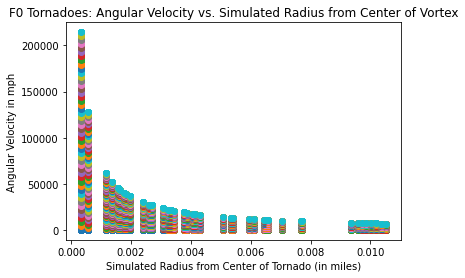

In [ ]:
plt.figure()
for j in f0rad_sim:
    for i in range(50):
        plt.scatter(f0rad_simvalues[i], f0_simdf[i])
plt.xlabel('Simulated Radius from Center of Tornado (in miles)')
plt.ylabel('Angular Velocity in mph')
plt.title('F0 Tornadoes: Angular Velocity vs. Simulated Radius from Center of Vortex')
plt.show()

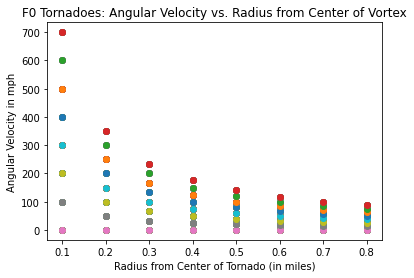

In [ ]:
plt.figure()
for j in rf0:
    for i in range(8):
        plt.scatter(f0rad_values[i], f0_df[i])
plt.xlabel('Radius from Center of Tornado (in miles)')
plt.ylabel('Angular Velocity in mph')
plt.title('F0 Tornadoes: Angular Velocity vs. Radius from Center of Vortex')
plt.show()

## F1 Tornadoes

### F1 Simulation

In [ ]:
#velocity ranges for F1

f1 = []

for i in range(73,112,6):
    f1.append(i)
    
f1 = np.array(f1)

print(f1)


[ 73  79  85  91  97 103 109]


In [ ]:
#Radius ranges for F1 in miles

rf1 = np.arange(0.1, 0.866667, 0.1)

print(rf1)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]


In [ ]:
#radius ranges for width

#find distribution of widths for F1 tornadoes


f1mag = details[(details.TOR_F_SCALE == 1)&(details.TOR_WIDTH >73)&(details.TOR_WIDTH < 112)]
f1mag.head()

,yr,mo,dy,date,time,tz,st,TOR_F_SCALE,inj,fat,loss,len,TOR_WIDTH
14,1950,2,12,2/12/1950,11:57:00,3,TX,1,32,0,NaN,7.7,100
50,1950,4,2,4/2/1950,18:00:00,3,AR,1,0,0,NaN,0.8,100
54,1950,4,24,4/24/1950,7:45:00,3,LA,1,0,0,NaN,2.0,100
63,1950,5,1,5/1/1950,1:00:00,3,LA,1,0,0,NaN,2.0,100
68,1950,5,1,5/1/1950,11:30:00,3,LA,1,2,0,NaN,1.0,100


In [ ]:
f1mag['TOR_WIDTH'].describe()

count    2943.000000
mean       94.461774
std         9.983151
min        75.000000
25%       100.000000
50%       100.000000
75%       100.000000
max       110.000000
Name: TOR_WIDTH, dtype: float64

In [ ]:
#Radius ranges for F1 in miles


rf1 = np.arange(75/5280, 110/5280, 0.001)

print(rf1)
print(f1)

[0.01420455 0.01520455 0.01620455 0.01720455 0.01820455 0.01920455
 0.02020455]
[ 73  79  85  91  97 103 109]


In [ ]:
#calculate the angular velocity

f1_array = []

for i in rf1:
    loop_list = []
    for j in f1:
        x = j/i
        loop_list.append(x)
    f1_array.append(loop_list)
    
print(f1_array)

f1_df = pd.DataFrame(f1_array)

[[5139.2, 5561.6, 5984.0, 6406.400000000001, 6828.8, 7251.2, 7673.6], [4801.1958146487295, 5195.814648729447, 5590.433482810165, 5985.052316890882, 6379.6711509716, 6774.289985052317, 7168.908819133035], [4504.908835904629, 4875.1753155680235, 5245.441795231418, 5615.708274894812, 5985.974754558206, 6356.2412342216, 6726.507713884995], [4243.064729194189, 4591.809775429327, 4940.554821664466, 5289.299867899605, 5638.0449141347435, 5986.7899603698825, 6335.5350066050205], [4009.9875156054936, 4339.575530586767, 4669.163545568041, 4998.751560549314, 5328.339575530587, 5657.927590511861, 5987.515605493134], [3801.183431952664, 4113.6094674556225, 4426.035502958581, 4738.46153846154, 5050.887573964498, 5363.313609467457, 5675.739644970416], [3613.048368953882, 3910.011248593927, 4206.974128233972, 4503.937007874018, 4800.899887514062, 5097.862767154107, 5394.825646794153]]


In [ ]:
f1rad_values = []

for i in range(7):
    rad_list = []
    for j in range(7):
        rad_list.append(rf1[j])
    f1rad_values.append(rad_list)
    
print(f1rad_values)

[[0.014204545454545454, 0.015204545454545453, 0.01620454545454545, 0.01720454545454545, 0.018204545454545452, 0.01920454545454545, 0.020204545454545447], [0.014204545454545454, 0.015204545454545453, 0.01620454545454545, 0.01720454545454545, 0.018204545454545452, 0.01920454545454545, 0.020204545454545447], [0.014204545454545454, 0.015204545454545453, 0.01620454545454545, 0.01720454545454545, 0.018204545454545452, 0.01920454545454545, 0.020204545454545447], [0.014204545454545454, 0.015204545454545453, 0.01620454545454545, 0.01720454545454545, 0.018204545454545452, 0.01920454545454545, 0.020204545454545447], [0.014204545454545454, 0.015204545454545453, 0.01620454545454545, 0.01720454545454545, 0.018204545454545452, 0.01920454545454545, 0.020204545454545447], [0.014204545454545454, 0.015204545454545453, 0.01620454545454545, 0.01720454545454545, 0.018204545454545452, 0.01920454545454545, 0.020204545454545447], [0.014204545454545454, 0.015204545454545453, 0.01620454545454545, 0.0172045454545

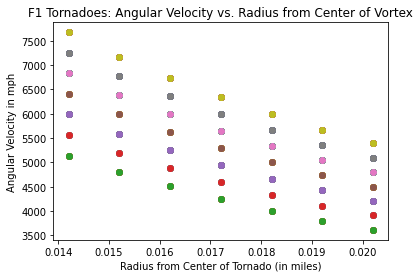

In [ ]:
plt.figure()
for j in rf1:
    for i in range(7):
        plt.scatter(f1rad_values[i], f1_df[i])
plt.xlabel('Radius from Center of Tornado (in miles)')
plt.ylabel('Angular Velocity in mph')
plt.title('F1 Tornadoes: Angular Velocity vs. Radius from Center of Vortex')
plt.show()

### Calculating Probability Density Functions: F1 Tornadoes



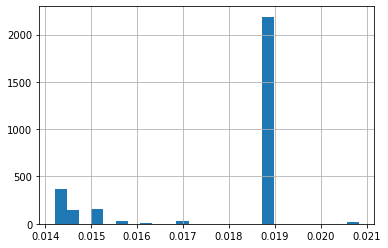

In [ ]:
f1rad_mi = f1mag['TOR_WIDTH']/5280
f1rad_mi.hist(bins=25)

In [ ]:
f1rad_count = pd.cut(f1rad_mi, bins=10, include_lowest = True, ordered = True).value_counts()
f1rad_count = f1rad_count.reindex(f1rad_count.index.categories)
f1rad_count.reindex(f1rad_count.index)

(0.0132, 0.0149]     515
(0.0149, 0.0155]     153
(0.0155, 0.0162]      32
(0.0162, 0.0169]       2
(0.0169, 0.0175]      29
(0.0175, 0.0182]       1
(0.0182, 0.0188]       1
(0.0188, 0.0195]    2189
(0.0195, 0.0202]       0
(0.0202, 0.0208]      21
Name: TOR_WIDTH, dtype: int64

In [ ]:
f1rad_prob = f1rad_count/2943
f1rad_prob

(0.0132, 0.0149]    0.174992
(0.0149, 0.0155]    0.051988
(0.0155, 0.0162]    0.010873
(0.0162, 0.0169]    0.000680
(0.0169, 0.0175]    0.009854
(0.0175, 0.0182]    0.000340
(0.0182, 0.0188]    0.000340
(0.0188, 0.0195]    0.743799
(0.0195, 0.0202]    0.000000
(0.0202, 0.0208]    0.007136
Name: TOR_WIDTH, dtype: float64

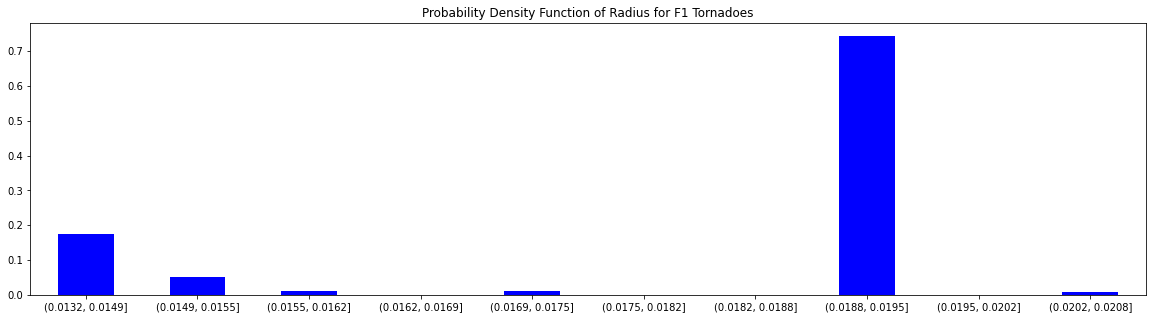

In [ ]:
ax = f1rad_prob.plot.bar(rot=0, color="b", figsize=(20,5))
plt.title('Probability Density Function of Radius for F1 Tornadoes')
plt.show()

In [ ]:
# calculate parameters
sample_mean = np.mean(f1rad_prob)
sample_std = np.std(f1rad_prob)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))

Mean=0.100, Standard Deviation=0.221


In [ ]:
i = np.random.choice(np.arange(0,10), p=[0.174990, 0.051988, 0.010873, 0.000680, 0.009854, 0.000340, 0.000340, 0.743799, 0.000000, 0.007136])
f1_lob=(0.0132,0.0149,0.0155,0.0162,0.0169,0.0175,0.0182,0.0188,0.0195,0.0202)
f1_upb=(0.0149,0.0155,0.0162,0.0169,0.0175,0.0182,0.0188,0.0195,0.0202,0.0208)

f1range = []
f1rad_sim = []

for x in range(50):
  i = np.random.choice(np.arange(0,10), p=[0.174990, 0.051988, 0.010873, 0.000680, 0.009854, 0.000340, 0.000340, 0.743799, 0.000000, 0.007136])
  f1rad_sim.append(random.uniform(f1_lob[i], f1_upb[i]))

f1rad_sim = np.array(f1rad_sim)
print(f1rad_sim)
# x=runif(n,min=lob[i],max=upb[i],rep=TRUE)

[0.01330172 0.019361   0.01913725 0.01939456 0.01920144 0.01335511
 0.01949482 0.01905016 0.01503696 0.01926672 0.01923137 0.01388671
 0.01925013 0.01892033 0.01942707 0.01890566 0.01931589 0.01914483
 0.01889008 0.01941919 0.01450625 0.01901283 0.01916791 0.01696033
 0.01893904 0.01884212 0.01905101 0.01402527 0.0192356  0.01906286
 0.01936634 0.01886305 0.0194361  0.01881059 0.01934493 0.01346582
 0.01359052 0.0193863  0.01887604 0.01914539 0.01928695 0.01899189
 0.01935488 0.01901411 0.01885651 0.01947476 0.01941418 0.018864
 0.01922041 0.01932843]


### F1 Probablistic Simulation

In [ ]:
#velocity ranges for F1

f1_sim = []

for i in np.arange(73,112,0.78):
    f1_sim.append(i)
    
f1_sim = np.array(f1_sim)

print(f1_sim)

[ 73.    73.78  74.56  75.34  76.12  76.9   77.68  78.46  79.24  80.02
  80.8   81.58  82.36  83.14  83.92  84.7   85.48  86.26  87.04  87.82
  88.6   89.38  90.16  90.94  91.72  92.5   93.28  94.06  94.84  95.62
  96.4   97.18  97.96  98.74  99.52 100.3  101.08 101.86 102.64 103.42
 104.2  104.98 105.76 106.54 107.32 108.1  108.88 109.66 110.44 111.22]


In [ ]:
#calculate the angular velocity

f1_simarray = []

for i in f1rad_sim:
    loop_list = []
    for j in f1_sim:
        x = j/i
        loop_list.append(x)
    f1_simarray.append(loop_list)
    
print(f1_simarray)

f1_simdf = pd.DataFrame(f1_simarray)

[[5488.012211503644, 5546.651246092313, 5605.2902806809825, 5663.929315269652, 5722.568349858321, 5781.20738444699, 5839.846419035659, 5898.485453624328, 5957.124488212998, 6015.763522801667, 6074.4025573903355, 6133.041591979005, 6191.680626567674, 6250.3196611563435, 6308.958695745013, 6367.597730333681, 6426.236764922351, 6484.87579951102, 6543.514834099689, 6602.153868688359, 6660.792903277027, 6719.431937865696, 6778.070972454366, 6836.710007043035, 6895.349041631704, 6953.988076220373, 7012.627110809042, 7071.266145397712, 7129.905179986381, 7188.544214575049, 7247.183249163719, 7305.822283752388, 7364.461318341057, 7423.100352929727, 7481.739387518395, 7540.378422107065, 7599.017456695734, 7657.656491284403, 7716.295525873073, 7774.934560461741, 7833.57359505041, 7892.21262963908, 7950.851664227749, 8009.490698816418, 8068.129733405087, 8126.768767993756, 8185.407802582426, 8244.046837171094, 8302.685871759764, 8361.324906348433], [3770.4670956233513, 3810.754278288916, 3851.041

In [ ]:
f1rad_simvalues = []

for i in range(50):
    rad_list = []
    for j in range(50):
        rad_list.append(f1rad_sim[j])
    f1rad_simvalues.append(rad_list)
    
print(f1rad_simvalues)

[[0.013301719673105273, 0.01936099643588888, 0.01913724627568836, 0.01939456241434976, 0.019201441528100348, 0.013355108866640795, 0.01949482024235783, 0.019050161507699254, 0.01503696060135405, 0.019266716543169943, 0.019231367497839564, 0.013886707560267686, 0.019250126709442428, 0.01892033058847224, 0.01942706635872781, 0.0189056628526224, 0.019315891632351825, 0.01914483026364889, 0.01889007947730925, 0.019419191711740474, 0.01450624535801587, 0.01901283275201619, 0.019167905088861768, 0.016960328913774362, 0.018939039360995266, 0.018842121072436845, 0.01905101035630856, 0.014025266664563538, 0.01923559851254163, 0.01906285547603258, 0.019366341920024323, 0.018863051378172256, 0.01943610096437025, 0.018810593536784256, 0.019344925943586243, 0.013465820328373354, 0.013590520611175973, 0.019386299698721396, 0.018876042038372485, 0.01914538598302167, 0.019286950340342675, 0.01899189291699145, 0.01935487956727688, 0.019014107394880197, 0.018856510683880015, 0.01947476012495111, 0.01941

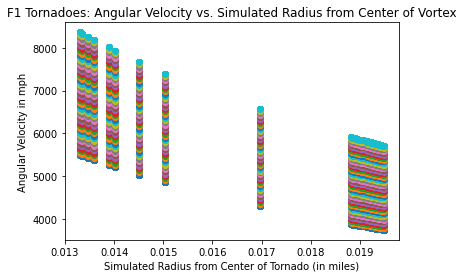

In [ ]:
plt.figure()
for j in f1rad_sim:
    for i in range(50):
        plt.scatter(f1rad_simvalues[i], f1_simdf[i])
plt.xlabel('Simulated Radius from Center of Tornado (in miles)')
plt.ylabel('Angular Velocity in mph')
plt.title('F1 Tornadoes: Angular Velocity vs. Simulated Radius from Center of Vortex')
plt.show()

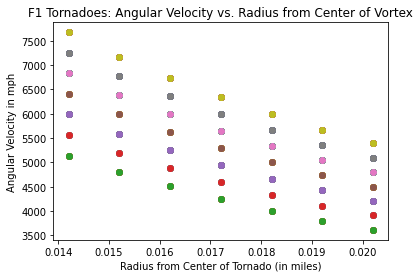

In [ ]:
plt.figure()
for j in rf1:
    for i in range(7):
        plt.scatter(f1rad_values[i], f1_df[i])
plt.xlabel('Radius from Center of Tornado (in miles)')
plt.ylabel('Angular Velocity in mph')
plt.title('F1 Tornadoes: Angular Velocity vs. Radius from Center of Vortex')
plt.show()

## F2 Tornadoes

### F2 Simulation

In [ ]:
#velocity ranges for F2

f2 = []

for i in range(113,157,6):
    f2.append(i)
    
f2 = np.array(f2)

print(f2)


[113 119 125 131 137 143 149 155]


In [ ]:
#radius ranges for width

#find distribution of widths for F2 tornadoes


f2mag = details[(details.TOR_F_SCALE == 2)&(details.TOR_WIDTH >113)&(details.TOR_WIDTH < 157)]
f2mag.head()

,yr,mo,dy,date,time,tz,st,TOR_F_SCALE,inj,fat,loss,len,TOR_WIDTH
6,1950,1,26,1/26/1950,18:00:00,3,TX,2,2,0,NaN,4.7,133
28,1950,3,16,3/16/1950,9:15:00,3,FL,2,0,0,NaN,1.5,150
32,1950,3,26,3/26/1950,19:30:00,3,AR,2,3,0,NaN,17.4,150
53,1950,4,18,4/18/1950,1:45:00,3,AL,2,0,0,NaN,2.0,150
211,1951,2,20,2/20/1951,16:00:00,3,AL,2,2,0,NaN,0.1,123


In [ ]:
f2mag['TOR_WIDTH'].describe()

count    510.000000
mean     144.101961
std       10.622908
min      117.000000
25%      143.000000
50%      150.000000
75%      150.000000
max      150.000000
Name: TOR_WIDTH, dtype: float64

In [ ]:
#Radius ranges for F2 in miles


rf2 = np.arange(117/5280, 150/5280, 0.0008)

#rf2 and f2 must be the same length -- this is important in the matrix calculation
print(rf2)
print(f2)

[0.02215909 0.02295909 0.02375909 0.02455909 0.02535909 0.02615909
 0.02695909 0.02775909]
[113 119 125 131 137 143 149 155]


In [ ]:
#calculate the angular velocity

f2_array = []

for i in rf2:
    loop_list = []
    for j in f2:
        x = j/i
        loop_list.append(x)
    f2_array.append(loop_list)
    
print(f2_array)

f2_df = pd.DataFrame(f2_array)

[[5099.48717948718, 5370.25641025641, 5641.025641025641, 5911.794871794872, 6182.5641025641025, 6453.333333333333, 6724.1025641025635, 6994.871794871795], [4921.797663828945, 5183.1320530588, 5444.466442288656, 5705.800831518512, 5967.135220748367, 6228.469609978222, 6489.803999208078, 6751.138388437933], [4756.074229959824, 5008.609144824948, 5261.144059690071, 5513.678974555195, 5766.213889420318, 6018.748804285441, 6271.283719150565, 6523.818634015688], [4601.147510642237, 4845.45622802147, 5089.764945400704, 5334.073662779938, 5578.382380159172, 5822.691097538405, 6066.999814917639, 6311.308532296873], [4455.995698153792, 4692.597239648683, 4929.198781143575, 5165.800322638467, 5402.401864133359, 5639.00340562825, 5875.604947123142, 6112.206488618033], [4319.721980886187, 4549.087749782799, 4778.45351867941, 5007.819287576022, 5237.185056472634, 5466.550825369245, 5695.916594265857, 5925.282363162469], [4191.535997302311, 4414.09543078739, 4636.654864272468, 4859.214297757547, 5081

In [ ]:
f2rad_values = []

for i in range(8):
    rad_list = []
    for j in range(8):
        rad_list.append(rf2[j])
    f2rad_values.append(rad_list)
    
print(f2rad_values)

[[0.02215909090909091, 0.022959090909090908, 0.023759090909090907, 0.024559090909090905, 0.025359090909090904, 0.026159090909090903, 0.0269590909090909, 0.0277590909090909], [0.02215909090909091, 0.022959090909090908, 0.023759090909090907, 0.024559090909090905, 0.025359090909090904, 0.026159090909090903, 0.0269590909090909, 0.0277590909090909], [0.02215909090909091, 0.022959090909090908, 0.023759090909090907, 0.024559090909090905, 0.025359090909090904, 0.026159090909090903, 0.0269590909090909, 0.0277590909090909], [0.02215909090909091, 0.022959090909090908, 0.023759090909090907, 0.024559090909090905, 0.025359090909090904, 0.026159090909090903, 0.0269590909090909, 0.0277590909090909], [0.02215909090909091, 0.022959090909090908, 0.023759090909090907, 0.024559090909090905, 0.025359090909090904, 0.026159090909090903, 0.0269590909090909, 0.0277590909090909], [0.02215909090909091, 0.022959090909090908, 0.023759090909090907, 0.024559090909090905, 0.025359090909090904, 0.026159090909090903, 0.

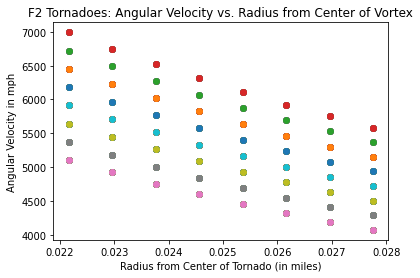

In [ ]:
plt.figure()
for j in rf2:
    for i in range(8):
        plt.scatter(f2rad_values[i], f2_df[i])
plt.xlabel('Radius from Center of Tornado (in miles)')
plt.ylabel('Angular Velocity in mph')
plt.title('F2 Tornadoes: Angular Velocity vs. Radius from Center of Vortex')
plt.show()

### F2 Probability Density Function

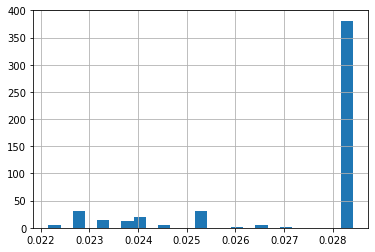

In [ ]:
f2rad_mi = f2mag['TOR_WIDTH']/5280
f2rad_mi.hist(bins=25)

In [ ]:
f2rad_count = pd.cut(f2rad_mi, bins=10, include_lowest = True, ordered = True).value_counts()
f2rad_count = f2rad_count.reindex(f2rad_count.index.categories)
f2rad_count.reindex(f2rad_count.index)

(0.0212, 0.0228]     36
(0.0228, 0.0234]     15
(0.0234, 0.024]      13
(0.024, 0.0247]      26
(0.0247, 0.0253]     30
(0.0253, 0.0259]      0
(0.0259, 0.0265]      7
(0.0265, 0.0272]      2
(0.0272, 0.0278]      0
(0.0278, 0.0284]    381
Name: TOR_WIDTH, dtype: int64

In [ ]:
f2rad_prob = f2rad_count/510
f2rad_prob

(0.0212, 0.0228]    0.070588
(0.0228, 0.0234]    0.029412
(0.0234, 0.024]     0.025490
(0.024, 0.0247]     0.050980
(0.0247, 0.0253]    0.058824
(0.0253, 0.0259]    0.000000
(0.0259, 0.0265]    0.013725
(0.0265, 0.0272]    0.003922
(0.0272, 0.0278]    0.000000
(0.0278, 0.0284]    0.747059
Name: TOR_WIDTH, dtype: float64

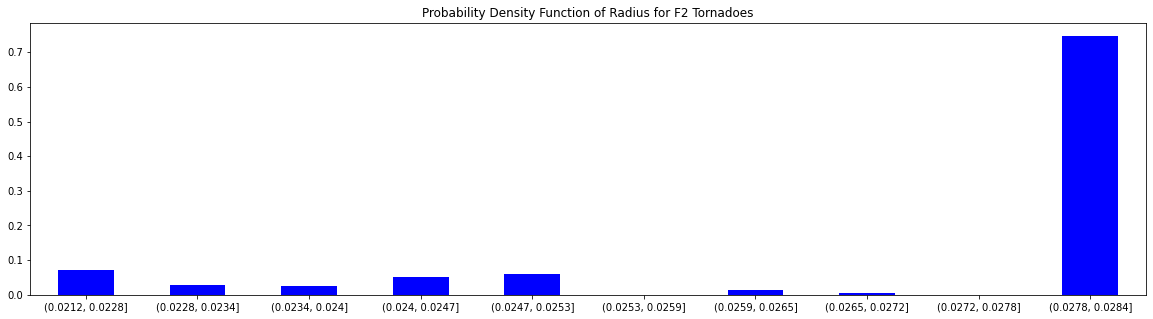

In [ ]:
ax2 = f2rad_prob.plot.bar(rot=0, color="b", figsize=(20,5))
plt.title('Probability Density Function of Radius for F2 Tornadoes')
plt.show()

In [ ]:
# calculate parameters
sample_mean2 = np.mean(f2rad_prob)
sample_std2 = np.std(f2rad_prob)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))

Mean=0.100, Standard Deviation=0.221


In [ ]:
f2_lob=(0.0212, 0.0228, 0.0234, 0.024, 0.0247, 0.0253, 0.0259, 0.0265, 0.0272, 0.0278)
f2_upb=(0.0228, 0.0234, 0.024, 0.0247, 0.0253, 0.0259, 0.0265, 0.0272, 0.0278, 0.0284)

f2range = []
f2rad_sim = []

for x in range(50):
  i = np.random.choice(np.arange(0,10), p=[0.174990, 0.051988, 0.010873, 0.000680, 0.009854, 0.000340, 0.000340, 0.743799, 0.000000, 0.007136])
  f2rad_sim.append(random.uniform(f2_lob[i], f2_upb[i]))

f2rad_sim = np.array(f2rad_sim)
print(f2rad_sim)

[0.02663969 0.02312479 0.02188038 0.02717795 0.02677363 0.02703057
 0.02653321 0.02671491 0.02690397 0.02701657 0.02685827 0.02671307
 0.0268717  0.02708281 0.0265005  0.02695259 0.02701246 0.02656087
 0.02702156 0.02702979 0.02706775 0.02685718 0.02705435 0.02692619
 0.02697812 0.0269099  0.02674765 0.02520698 0.0270126  0.02709878
 0.02661263 0.02715336 0.02701661 0.02707775 0.02696887 0.02716326
 0.02151938 0.02683371 0.0224894  0.02242546 0.02694877 0.02659079
 0.02388468 0.02672908 0.02679833 0.02693017 0.0268017  0.026512
 0.02263738 0.02144147]


### F2 Probabilistic Simulation

In [ ]:
#velocity ranges for F2

f2_sim = []

for i in np.arange(113,157,0.88):
    f2_sim.append(i)
    
f2_sim = np.array(f2_sim)

print(f2_sim)

[113.   113.88 114.76 115.64 116.52 117.4  118.28 119.16 120.04 120.92
 121.8  122.68 123.56 124.44 125.32 126.2  127.08 127.96 128.84 129.72
 130.6  131.48 132.36 133.24 134.12 135.   135.88 136.76 137.64 138.52
 139.4  140.28 141.16 142.04 142.92 143.8  144.68 145.56 146.44 147.32
 148.2  149.08 149.96 150.84 151.72 152.6  153.48 154.36 155.24 156.12]


In [ ]:
#calculate the angular velocity

f2_simarray = []

for i in f2rad_sim:
    loop_list = []
    for j in f2_sim:
        x = j/i
        loop_list.append(x)
    f2_simarray.append(loop_list)
    
print(f2_simarray)

f2_simdf = pd.DataFrame(f2_simarray)

[[4241.790519923899, 4274.823932822422, 4307.857345720944, 4340.890758619466, 4373.924171517989, 4406.957584416511, 4439.990997315033, 4473.024410213556, 4506.057823112077, 4539.0912360105995, 4572.124648909122, 4605.158061807644, 4638.191474706166, 4671.224887604689, 4704.258300503211, 4737.291713401733, 4770.325126300256, 4803.358539198778, 4836.3919520972995, 4869.425364995822, 4902.458777894344, 4935.4921907928665, 4968.525603691389, 5001.559016589911, 5034.5924294884335, 5067.625842386956, 5100.659255285478, 5133.692668184, 5166.726081082522, 5199.759493981044, 5232.7929068795665, 5265.826319778089, 5298.859732676611, 5331.8931455751335, 5364.926558473656, 5397.959971372178, 5430.9933842707005, 5464.026797169222, 5497.060210067744, 5530.093622966267, 5563.127035864789, 5596.160448763311, 5629.193861661834, 5662.227274560356, 5695.260687458878, 5728.294100357401, 5761.327513255922, 5794.360926154444, 5827.394339052967, 5860.427751951489], [4886.529874264856, 4924.584266206033, 4962

In [ ]:
f2rad_simvalues = []

for i in range(50):
    rad_list = []
    for j in range(50):
        rad_list.append(f2rad_sim[j])
    f2rad_simvalues.append(rad_list)
    
print(f2rad_simvalues)

[[0.02663969365512828, 0.023124794671801747, 0.02188037692777651, 0.02717794844364533, 0.026773631949372236, 0.02703057207852062, 0.026533209800550593, 0.02671490901328477, 0.02690396978115558, 0.02701656998710346, 0.02685826581835368, 0.026713074834712913, 0.02687169531922196, 0.02708280543746423, 0.026500497539435112, 0.026952591437246216, 0.027012463741366833, 0.026560868713234254, 0.02702155912835376, 0.02702978562983864, 0.027067749192968338, 0.026857183763147476, 0.027054350650877353, 0.02692619224755028, 0.026978115778859005, 0.02690990060228488, 0.026747651579959873, 0.025206977024087793, 0.027012595282378492, 0.02709878282231821, 0.026612633812899675, 0.027153358171017675, 0.027016610500648238, 0.027077745170974825, 0.0269688682360425, 0.027163260184322652, 0.02151937569876534, 0.02683371115375691, 0.022489401991420167, 0.022425458547894357, 0.026948768624741288, 0.026590786518175914, 0.02388467926417332, 0.026729077389078735, 0.026798333415516677, 0.026930168081907766, 0.0268

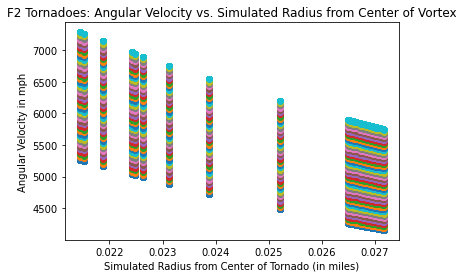

In [ ]:
plt.figure()
for j in f2rad_sim:
    for i in range(50):
        plt.scatter(f2rad_simvalues[i], f2_simdf[i])
plt.xlabel('Simulated Radius from Center of Tornado (in miles)')
plt.ylabel('Angular Velocity in mph')
plt.title('F2 Tornadoes: Angular Velocity vs. Simulated Radius from Center of Vortex')
plt.show()

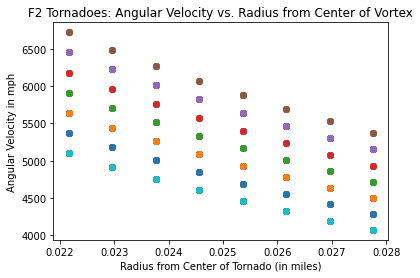

In [ ]:
plt.figure()
for j in rf2:
    for i in range(7):
        plt.scatter(f2rad_values[i], f2_df[i])
plt.xlabel('Radius from Center of Tornado (in miles)')
plt.ylabel('Angular Velocity in mph')
plt.title('F2 Tornadoes: Angular Velocity vs. Radius from Center of Vortex')
plt.show()

## F3 Tornadoes

### F3 Simulation

In [ ]:
#velocity ranges for F3

f3 = []

for i in range(158,206,6):
    f3.append(i)
    
f3 = np.array(f3)

print(f3)


[158 164 170 176 182 188 194 200]


In [ ]:
#radius ranges for width

#find distribution of widths for F3 tornadoes


f3mag = details[(details.TOR_F_SCALE == 3)&(details.TOR_WIDTH >158)&(details.TOR_WIDTH < 206)]
f3mag.head()

,yr,mo,dy,date,time,tz,st,TOR_F_SCALE,inj,fat,loss,len,TOR_WIDTH
33,1950,3,26,3/26/1950,19:31:00,3,AR,3,1,0,NaN,5.7,200
198,1950,12,2,12/2/1950,16:00:00,3,IL,3,25,2,NaN,18.0,200
242,1951,4,30,4/30/1951,21:30:00,3,OK,3,0,0,NaN,7.4,200
331,1951,6,8,6/8/1951,18:30:00,3,OK,3,0,0,NaN,10.9,173
376,1951,6,27,6/27/1951,20:45:00,3,IL,3,15,1,NaN,18.2,200


In [ ]:
f3mag['TOR_WIDTH'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: TOR_WIDTH, dtype: float64

In [ ]:
#Radius ranges for F3 in miles

rf3 = np.arange(158/5280, 206/5280, 0.0012)

#rf3 and f3 must be the same length -- this is important in the matrix calculation
print(rf3)
print(f3)

[0.02992424 0.03112424 0.03232424 0.03352424 0.03472424 0.03592424
 0.03712424 0.03832424]
[158 164 170 176 182 188 194 200]


In [ ]:
#calculate the angular velocity

f3_array = []

for i in rf3:
    loop_list = []
    for j in f3:
        x = j/i
        loop_list.append(x)
    f3_array.append(loop_list)
    
print(f3_array)

[[5280.0, 5480.506329113924, 5681.012658227848, 5881.518987341772, 6082.025316455696, 6282.53164556962, 6483.037974683544, 6683.544303797468], [5076.428780060364, 5269.204556518353, 5461.980332976342, 5654.75610943433, 5847.531885892318, 6040.3076623503075, 6233.083438808296, 6425.859215266284], [4887.972250867161, 5073.591450267179, 5259.210649667199, 5444.829849067217, 5630.449048467236, 5816.068247867254, 6001.6874472672735, 6187.306646667292], [4713.007321702974, 4891.982283286631, 5070.957244870288, 5249.932206453946, 5428.907168037603, 5607.882129621261, 5786.857091204918, 5965.832052788575], [4550.135264857317, 4722.925211624051, 4895.715158390785, 5068.505105157518, 5241.295051924252, 5414.084998690986, 5586.874945457719, 5759.664892224453], [4398.144242935471, 4565.162378743147, 4732.180514550822, 4899.1986503584985, 5066.216786166175, 5233.234921973851, 5400.253057781527, 5567.271193589203], [4255.979103746633, 4417.598563382581, 4579.2180230185295, 4740.837482654478, 4902.45

In [ ]:
f3_df = pd.DataFrame(f3_array)


In [ ]:
f3rad_values = []

for i in range(8):
    rad_list = []
    for j in range(8):
        rad_list.append(rf3[j])
    f3rad_values.append(rad_list)
    
print(f3rad_values)

[[0.029924242424242423, 0.031124242424242422, 0.03232424242424242, 0.03352424242424242, 0.03472424242424242, 0.03592424242424242, 0.03712424242424242, 0.03832424242424242], [0.029924242424242423, 0.031124242424242422, 0.03232424242424242, 0.03352424242424242, 0.03472424242424242, 0.03592424242424242, 0.03712424242424242, 0.03832424242424242], [0.029924242424242423, 0.031124242424242422, 0.03232424242424242, 0.03352424242424242, 0.03472424242424242, 0.03592424242424242, 0.03712424242424242, 0.03832424242424242], [0.029924242424242423, 0.031124242424242422, 0.03232424242424242, 0.03352424242424242, 0.03472424242424242, 0.03592424242424242, 0.03712424242424242, 0.03832424242424242], [0.029924242424242423, 0.031124242424242422, 0.03232424242424242, 0.03352424242424242, 0.03472424242424242, 0.03592424242424242, 0.03712424242424242, 0.03832424242424242], [0.029924242424242423, 0.031124242424242422, 0.03232424242424242, 0.03352424242424242, 0.03472424242424242, 0.03592424242424242, 0.03712424

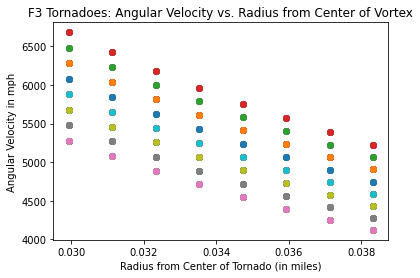

In [ ]:
plt.figure()
for j in rf3:
    for i in range(8):
        plt.scatter(f3rad_values[i], f3_df[i])
plt.xlabel('Radius from Center of Tornado (in miles)')
plt.ylabel('Angular Velocity in mph')
plt.title('F3 Tornadoes: Angular Velocity vs. Radius from Center of Vortex')
plt.show()

### F3 Probability Density Function

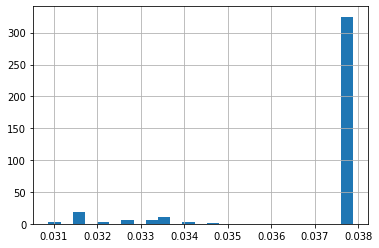

In [ ]:
f3rad_mi = f3mag['TOR_WIDTH']/5280
f3rad_mi.hist(bins=25)

In [ ]:
f3rad_count = pd.cut(f3rad_mi, bins=10, include_lowest = True, ordered = True).value_counts()
f3rad_count = f3rad_count.reindex(f3rad_count.index.categories)
f3rad_count.reindex(f3rad_count.index)

(0.0299, 0.0316]      3
(0.0316, 0.0323]     22
(0.0323, 0.033]       6
(0.033, 0.0337]      16
(0.0337, 0.0344]      3
(0.0344, 0.0351]      2
(0.0351, 0.0358]      0
(0.0358, 0.0365]      0
(0.0365, 0.0372]      0
(0.0372, 0.0379]    325
Name: TOR_WIDTH, dtype: int64

In [ ]:
f3rad_prob = f3rad_count/377
f3rad_prob

(0.0299, 0.0316]    0.007958
(0.0316, 0.0323]    0.058355
(0.0323, 0.033]     0.015915
(0.033, 0.0337]     0.042440
(0.0337, 0.0344]    0.007958
(0.0344, 0.0351]    0.005305
(0.0351, 0.0358]    0.000000
(0.0358, 0.0365]    0.000000
(0.0365, 0.0372]    0.000000
(0.0372, 0.0379]    0.862069
Name: TOR_WIDTH, dtype: float64

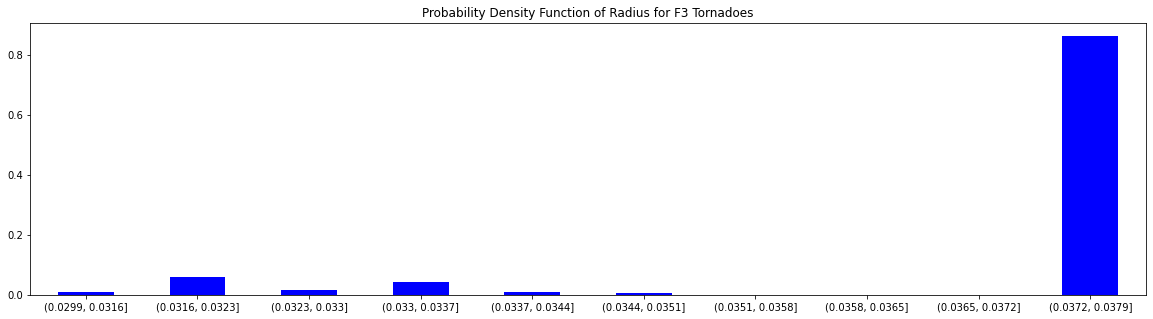

In [ ]:
ax3 = f3rad_prob.plot.bar(rot=0, color="b", figsize=(20,5))
plt.title('Probability Density Function of Radius for F3 Tornadoes')
plt.show()

In [ ]:
# calculate parameters
sample_mean3 = np.mean(f3rad_prob)
sample_std3 = np.std(f3rad_prob)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))

Mean=0.100, Standard Deviation=0.221


In [ ]:
f3_lob=(0.0299, 0.0316, 0.0323, 0.033, 0.0337, 0.0344, 0.0351, 0.0358, 0.0365, 0.0372)
f3_upb=(0.0316, 0.0323, 0.033, 0.0337, 0.0344, 0.0351, 0.0358, 0.0365, 0.0372, 0.0379)

f3range = []
f3rad_sim = []

for x in range(50):
  i = np.random.choice(np.arange(0,10), p=[0.007958, 0.058355, 0.015915, 0.042440, 0.007958, 0.005305, 0.000000, 0.000000, 0.000000, 0.862069])
  f3rad_sim.append(random.uniform(f3_lob[i], f3_upb[i]))

f3rad_sim = np.array(f3rad_sim)
print(f3rad_sim)

[0.03746435 0.03765625 0.03303094 0.03789912 0.03750574 0.03740188
 0.037263   0.03766735 0.03782136 0.03751639 0.03786248 0.03340811
 0.03767449 0.03739156 0.03780658 0.03778024 0.0373259  0.03782229
 0.03761889 0.03767172 0.03768047 0.03727912 0.03760858 0.03780486
 0.03727546 0.03724436 0.0378148  0.03766921 0.03746024 0.03166728
 0.03738777 0.03722026 0.03728015 0.03721385 0.03780497 0.03772981
 0.03172324 0.03728413 0.03751627 0.03186309 0.03743309 0.03747506
 0.03735673 0.03721434 0.03762952 0.03777791 0.03732902 0.03723892
 0.03776376 0.0378586 ]


### F3 Probabilistic Simulation

In [ ]:
#velocity ranges for F3

f3_sim = []

for i in np.arange(158,206,0.96):
    f3_sim.append(i)
    
f3_sim = np.array(f3_sim)

print(f3_sim)

[158.   158.96 159.92 160.88 161.84 162.8  163.76 164.72 165.68 166.64
 167.6  168.56 169.52 170.48 171.44 172.4  173.36 174.32 175.28 176.24
 177.2  178.16 179.12 180.08 181.04 182.   182.96 183.92 184.88 185.84
 186.8  187.76 188.72 189.68 190.64 191.6  192.56 193.52 194.48 195.44
 196.4  197.36 198.32 199.28 200.24 201.2  202.16 203.12 204.08 205.04]


In [ ]:
#calculate the angular velocity

f3_simarray = []

for i in f3rad_sim:
    loop_list = []
    for j in f3_sim:
        x = j/i
        loop_list.append(x)
    f3_simarray.append(loop_list)
    
print(f3_simarray)

f3_simdf = pd.DataFrame(f3_simarray)

[[4217.342518716316, 4242.966878323706, 4268.591237931097, 4294.215597538487, 4319.839957145878, 4345.464316753268, 4371.088676360659, 4396.713035968049, 4422.33739557544, 4447.96175518283, 4473.586114790221, 4499.210474397611, 4524.8348340050015, 4550.459193612392, 4576.0835532197825, 4601.707912827173, 4627.3322724345635, 4652.9566320419535, 4678.5809916493445, 4704.2053512567345, 4729.829710864125, 4755.4540704715155, 4781.078430078906, 4806.7027896862965, 4832.327149293687, 4857.951508901077, 4883.575868508468, 4909.200228115858, 4934.824587723248, 4960.448947330639, 4986.073306938029, 5011.69766654542, 5037.32202615281, 5062.946385760201, 5088.570745367591, 5114.195104974982, 5139.819464582372, 5165.443824189763, 5191.068183797153, 5216.692543404544, 5242.316903011934, 5267.941262619325, 5293.565622226715, 5319.189981834106, 5344.814341441496, 5370.438701048887, 5396.063060656277, 5421.687420263668, 5447.311779871058, 5472.936139478449], [4195.850675543255, 4221.34445179972, 4246.

In [ ]:
f3rad_simvalues = []

for i in range(50):
    rad_list = []
    for j in range(50):
        rad_list.append(f3rad_sim[j])
    f3rad_simvalues.append(rad_list)
    
print(f3rad_simvalues)

[[0.037464350903158895, 0.03765624952311799, 0.03303093536370165, 0.03789912207205052, 0.03750574285265483, 0.037401878292903645, 0.0372630040696011, 0.037667347464188254, 0.037821356403357036, 0.03751638912933885, 0.037862478366257106, 0.03340810667446413, 0.03767449398894269, 0.03739156056072076, 0.03780657673964707, 0.03778023902649215, 0.03732590163272977, 0.03782228830457635, 0.0376188892054182, 0.03767171677932757, 0.037680465027590974, 0.03727911908881201, 0.03760858100700717, 0.037804858656825466, 0.03727545934807316, 0.03724435653634668, 0.037814802345586145, 0.03766921269607202, 0.037460243325800224, 0.03166727874355265, 0.03738776990395436, 0.03722025692626526, 0.03728015398776756, 0.03721385088494135, 0.03780497215707106, 0.0377298127778396, 0.031723241993667134, 0.03728412680016655, 0.03751627063409843, 0.03186309111100903, 0.0374330873354404, 0.037475059202999275, 0.03735672648373724, 0.037214344930695316, 0.03762951600231621, 0.03777790598555324, 0.03732902452773204, 0.0

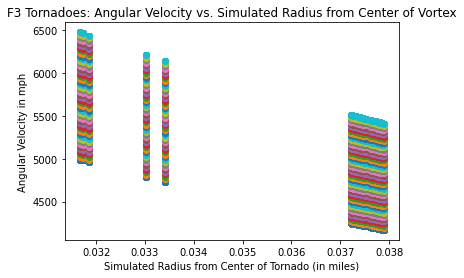

In [ ]:
plt.figure()
for j in f3rad_sim:
    for i in range(50):
        plt.scatter(f3rad_simvalues[i], f3_simdf[i])
plt.xlabel('Simulated Radius from Center of Tornado (in miles)')
plt.ylabel('Angular Velocity in mph')
plt.title('F3 Tornadoes: Angular Velocity vs. Simulated Radius from Center of Vortex')
plt.show()

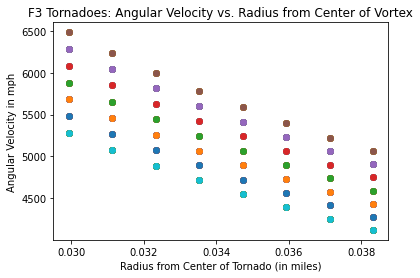

In [ ]:
plt.figure()
for j in rf3:
    for i in range(7):
        plt.scatter(f3rad_values[i], f3_df[i])
plt.xlabel('Radius from Center of Tornado (in miles)')
plt.ylabel('Angular Velocity in mph')
plt.title('F3 Tornadoes: Angular Velocity vs. Radius from Center of Vortex')
plt.show()

## F4 Tornadoes

### F4 Simulation

In [ ]:
#velocity ranges for F4

f4 = []

for i in range(207,260,7):
    f4.append(i)
    
f4 = np.array(f4)

print(f4)


[207 214 221 228 235 242 249 256]


In [ ]:
#radius ranges for width

#find distribution of widths for F4 tornadoes


f4mag = details[(details.TOR_F_SCALE == 4)&(details.TOR_WIDTH >207)&(details.TOR_WIDTH < 260)]
f4mag.head()

,yr,mo,dy,date,time,tz,st,TOR_F_SCALE,inj,fat,loss,len,TOR_WIDTH
58,1950,4,28,4/28/1950,18:00:00,3,TX,4,5,5,NaN,1.3,233
3328,1957,6,14,6/14/1957,14:00:00,3,IL,4,50,2,NaN,4.3,220
3597,1957,12,18,12/18/1957,15:55:00,3,IL,4,45,1,NaN,16.8,250
6333,1962,5,25,5/25/1962,18:28:00,3,OK,4,9,0,NaN,7.2,250
7248,1964,3,4,3/4/1964,11:30:00,3,KY,4,24,3,NaN,18.5,250


In [ ]:
f4mag['TOR_WIDTH'].describe()

count     29.000000
mean     247.344828
std        8.203988
min      220.000000
25%      250.000000
50%      250.000000
75%      250.000000
max      250.000000
Name: TOR_WIDTH, dtype: float64

In [ ]:
#Radius ranges for F4 in miles

rf4 = np.arange(207/5280, 260/5280, 0.0013)

#rf4 and f4 must be the same length -- this is important in the matrix calculation
print(rf4)
print(f4)

[0.03920455 0.04050455 0.04180455 0.04310455 0.04440455 0.04570455
 0.04700455 0.04830455]
[207 214 221 228 235 242 249 256]


In [ ]:
#calculate the angular velocity

f4_array = []

for i in rf4:
    loop_list = []
    for j in f4:
        x = j/i
        loop_list.append(x)
    f4_array.append(loop_list)
    
print(f4_array)

[[5280.0, 5458.550724637681, 5637.101449275362, 5815.652173913043, 5994.202898550724, 6172.753623188405, 6351.304347826086, 6529.855072463768], [5110.537537874537, 5283.35764785097, 5456.177757827403, 5628.997867803837, 5801.817977780271, 5974.638087756704, 6147.458197733138, 6320.278307709572], [4951.614656953353, 5119.060563227138, 5286.506469500923, 5453.952375774708, 5621.3982820484935, 5788.844188322278, 5956.290094596063, 6123.736000869848], [4802.277760202466, 4964.673626489506, 5127.069492776546, 5289.465359063586, 5451.861225350626, 5614.257091637666, 5776.652957924706, 5939.048824211746], [4661.684921691062, 4819.326440782064, 4976.967959873066, 5134.609478964068, 5292.25099805507, 5449.892517146072, 5607.534036237075, 5765.175555328077], [4529.090004972649, 4682.247637991048, 4835.405271009447, 4988.562904027845, 5141.720537046244, 5294.878170064642, 5448.035803083041, 5601.19343610144], [4403.829416884246, 4552.751184604968, 4701.672952325692, 4850.594720046415, 4999.516487

In [ ]:
f4_df = pd.DataFrame(f4_array)


In [ ]:
f4rad_values = []

for i in range(8):
    rad_list = []
    for j in range(8):
        rad_list.append(rf4[j])
    f4rad_values.append(rad_list)
    
print(f4rad_values)

[[0.03920454545454546, 0.04050454545454546, 0.04180454545454546, 0.043104545454545465, 0.04440454545454547, 0.04570454545454547, 0.04700454545454547, 0.048304545454545475], [0.03920454545454546, 0.04050454545454546, 0.04180454545454546, 0.043104545454545465, 0.04440454545454547, 0.04570454545454547, 0.04700454545454547, 0.048304545454545475], [0.03920454545454546, 0.04050454545454546, 0.04180454545454546, 0.043104545454545465, 0.04440454545454547, 0.04570454545454547, 0.04700454545454547, 0.048304545454545475], [0.03920454545454546, 0.04050454545454546, 0.04180454545454546, 0.043104545454545465, 0.04440454545454547, 0.04570454545454547, 0.04700454545454547, 0.048304545454545475], [0.03920454545454546, 0.04050454545454546, 0.04180454545454546, 0.043104545454545465, 0.04440454545454547, 0.04570454545454547, 0.04700454545454547, 0.048304545454545475], [0.03920454545454546, 0.04050454545454546, 0.04180454545454546, 0.043104545454545465, 0.04440454545454547, 0.04570454545454547, 0.047004545

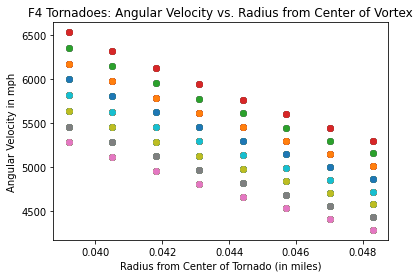

In [ ]:
plt.figure()
for j in rf4:
    for i in range(8):
        plt.scatter(f4rad_values[i], f4_df[i])
plt.xlabel('Radius from Center of Tornado (in miles)')
plt.ylabel('Angular Velocity in mph')
plt.title('F4 Tornadoes: Angular Velocity vs. Radius from Center of Vortex')
plt.show()

### F4 Probability Density Function

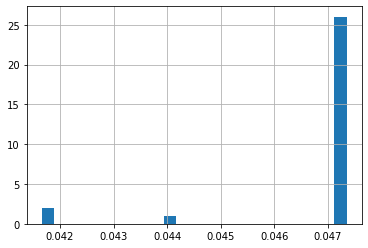

In [ ]:
f4rad_mi = f4mag['TOR_WIDTH']/5280
f4rad_mi.hist(bins=25)

In [ ]:
f4rad_count = pd.cut(f4rad_mi, bins=10, include_lowest = True, ordered = True).value_counts()
f4rad_count = f4rad_count.reindex(f4rad_count.index.categories)
f4rad_count.reindex(f4rad_count.index)

(0.0407, 0.0422]     2
(0.0422, 0.0428]     0
(0.0428, 0.0434]     0
(0.0434, 0.0439]     0
(0.0439, 0.0445]     1
(0.0445, 0.0451]     0
(0.0451, 0.0456]     0
(0.0456, 0.0462]     0
(0.0462, 0.0468]     0
(0.0468, 0.0473]    26
Name: TOR_WIDTH, dtype: int64

In [ ]:
f4rad_prob = f4rad_count/29
f4rad_prob

(0.0407, 0.0422]    0.068966
(0.0422, 0.0428]    0.000000
(0.0428, 0.0434]    0.000000
(0.0434, 0.0439]    0.000000
(0.0439, 0.0445]    0.034483
(0.0445, 0.0451]    0.000000
(0.0451, 0.0456]    0.000000
(0.0456, 0.0462]    0.000000
(0.0462, 0.0468]    0.000000
(0.0468, 0.0473]    0.896552
Name: TOR_WIDTH, dtype: float64

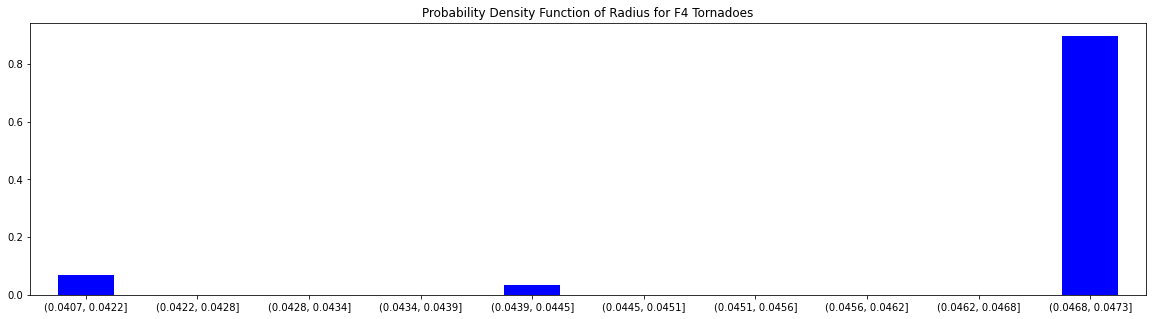

In [ ]:
ax4 = f4rad_prob.plot.bar(rot=0, color="b", figsize=(20,5))
plt.title('Probability Density Function of Radius for F4 Tornadoes')
plt.show()

In [ ]:
# calculate parameters
sample_mean4 = np.mean(f4rad_prob)
sample_std4 = np.std(f4rad_prob)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))

Mean=0.100, Standard Deviation=0.221


In [ ]:
f4_lob=(0.0407, 0.0422, 0.0428, 0.0434, 0.0439, 0.0445, 0.0451, 0.0456, 0.0462, 0.0468)
f4_upb=(0.0422, 0.0428, 0.0434, 0.0439, 0.0445, 0.0451, 0.0456, 0.0462, 0.0468, 0.0473)

f4range = []
f4rad_sim = []

for x in range(50):
  i = np.random.choice(np.arange(0,10), p=[0.068966, 0.000000, 0.000000, 0.000000, 0.034483, 0.000000, 0.000000, 0.000000, 0.000000, 0.896551])
  f4rad_sim.append(random.uniform(f4_lob[i], f4_upb[i]))

f4rad_sim = np.array(f4rad_sim)
print(f4rad_sim)

[0.04705544 0.04719597 0.04687694 0.04443946 0.0469195  0.04719788
 0.04700206 0.04686715 0.04706604 0.04689878 0.0472131  0.04699157
 0.04717844 0.04726497 0.04182185 0.04718278 0.04693831 0.04715878
 0.04692017 0.04686257 0.04713973 0.04688122 0.04694233 0.04418017
 0.04727962 0.04688909 0.04712527 0.04700634 0.04702711 0.04706577
 0.04721833 0.04694746 0.04727498 0.04705901 0.0469551  0.04697261
 0.0470751  0.0472197  0.04697932 0.0472114  0.04699308 0.0470726
 0.04725248 0.04696708 0.04724685 0.04702571 0.04682527 0.04688122
 0.04689652 0.04696578]


### F4 Probabilistic Simulation

In [ ]:
#velocity ranges for F4

f4_sim = []

for i in np.arange(207,260,1.06):
    f4_sim.append(i)
    
f4_sim = np.array(f4_sim)

print(f4_sim)

[207.   208.06 209.12 210.18 211.24 212.3  213.36 214.42 215.48 216.54
 217.6  218.66 219.72 220.78 221.84 222.9  223.96 225.02 226.08 227.14
 228.2  229.26 230.32 231.38 232.44 233.5  234.56 235.62 236.68 237.74
 238.8  239.86 240.92 241.98 243.04 244.1  245.16 246.22 247.28 248.34
 249.4  250.46 251.52 252.58 253.64 254.7  255.76 256.82 257.88 258.94]


In [ ]:
#calculate the angular velocity

f4_simarray = []

for i in f4rad_sim:
    loop_list = []
    for j in f4_sim:
        x = j/i
        loop_list.append(x)
    f4_simarray.append(loop_list)
    
print(f4_simarray)

f4_simdf = pd.DataFrame(f4_simarray)

[[4399.066257169782, 4421.592876650941, 4444.119496132101, 4466.64611561326, 4489.172735094419, 4511.699354575579, 4534.225974056738, 4556.752593537897, 4579.279213019057, 4601.805832500217, 4624.332451981376, 4646.859071462535, 4669.3856909436945, 4691.912310424854, 4714.438929906013, 4736.965549387172, 4759.492168868332, 4782.018788349491, 4804.54540783065, 4827.0720273118095, 4849.598646792969, 4872.125266274128, 4894.651885755287, 4917.178505236447, 4939.705124717606, 4962.231744198765, 4984.7583636799245, 5007.284983161084, 5029.811602642243, 5052.338222123402, 5074.864841604562, 5097.391461085721, 5119.91808056688, 5142.4447000480395, 5164.971319529199, 5187.497939010359, 5210.024558491518, 5232.551177972678, 5255.077797453837, 5277.604416934996, 5300.131036416155, 5322.657655897315, 5345.184275378474, 5367.710894859633, 5390.237514340793, 5412.764133821952, 5435.290753303111, 5457.81737278427, 5480.34399226543, 5502.870611746589], [4385.967579276694, 4408.427123402458, 4430.8866

In [ ]:
f4rad_simvalues = []

for i in range(50):
    rad_list = []
    for j in range(50):
        rad_list.append(f4rad_sim[j])
    f4rad_simvalues.append(rad_list)
    
print(f4rad_simvalues)

[[0.0470554403818362, 0.047195971301305685, 0.046876939211325346, 0.04443945888827862, 0.04691950147832075, 0.04719787505679987, 0.047002057973698524, 0.04686714846077067, 0.04706603529574334, 0.04689878219883898, 0.047213103558645095, 0.04699156795157766, 0.0471784378124013, 0.04726497096079779, 0.04182184948433827, 0.04718278055531336, 0.046938307750304664, 0.04715877725219429, 0.04692016891288548, 0.046862572600764825, 0.04713972803847577, 0.0468812186692855, 0.04694232870176185, 0.044180170743550205, 0.04727962442631964, 0.04688909081992484, 0.04712527283783263, 0.04700634451742349, 0.04702710604173075, 0.04706577301422982, 0.04721833141590664, 0.046947463101580746, 0.04727497787378592, 0.04705900915806725, 0.046955096243299604, 0.04697261114960673, 0.04707509863165215, 0.04721970356030358, 0.04697931669921228, 0.04721139727537885, 0.04699307981510749, 0.047072601173916186, 0.04725248093453148, 0.046967080136724404, 0.04724684526302876, 0.04702570906698201, 0.04682526898638, 0.0468

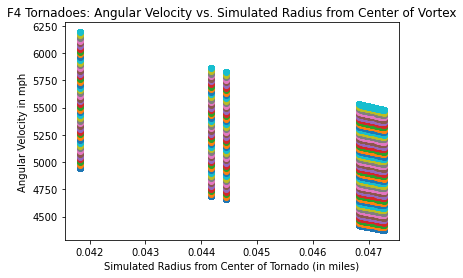

In [ ]:
plt.figure()
for j in f4rad_sim:
    for i in range(50):
        plt.scatter(f4rad_simvalues[i], f4_simdf[i])
plt.xlabel('Simulated Radius from Center of Tornado (in miles)')
plt.ylabel('Angular Velocity in mph')
plt.title('F4 Tornadoes: Angular Velocity vs. Simulated Radius from Center of Vortex')
plt.show()

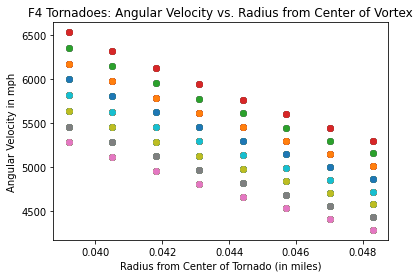

In [ ]:
plt.figure()
for j in rf4:
    for i in range(8):
        plt.scatter(f4rad_values[i], f4_df[i])
plt.xlabel('Radius from Center of Tornado (in miles)')
plt.ylabel('Angular Velocity in mph')
plt.title('F4 Tornadoes: Angular Velocity vs. Radius from Center of Vortex')
plt.show()

## F5 Tornadoes

### F5 Simulation

In [ ]:
#velocity ranges for F5

f5 = []

for i in range(261,1760,150):
    f5.append(i)
    
f5 = np.array(f5)

print(f5)


[ 261  411  561  711  861 1011 1161 1311 1461 1611]


In [ ]:
#radius ranges for width

#find distribution of widths for F5 tornadoes


f5mag = details[(details.TOR_F_SCALE == 5)&(details.TOR_WIDTH >261)]
f5mag.head()

,yr,mo,dy,date,time,tz,st,TOR_F_SCALE,inj,fat,loss,len,TOR_WIDTH
862,1953,5,11,5/11/1953,16:10:00,3,TX,5,597,114,NaN,20.9,583
901,1953,5,29,5/29/1953,17:00:00,3,ND,5,20,2,NaN,14.8,600
975,1953,6,8,6/8/1953,19:30:00,3,MI,5,844,116,NaN,18.9,833
1115,1953,12,5,12/5/1953,17:45:00,3,MS,5,270,38,NaN,9.0,500
1896,1955,5,25,5/25/1955,21:26:00,3,OK,5,280,20,NaN,28.4,500


In [ ]:
f5mag['TOR_WIDTH'].describe()

count      96.000000
mean      692.229167
std       346.050117
min       280.000000
25%       450.000000
50%       516.500000
75%       880.000000
max      1760.000000
Name: TOR_WIDTH, dtype: float64

In [ ]:
#Radius ranges for F5 in miles

rf5 = np.arange(261/5280, 1760/5280, 0.03)

#rf5 and f5 must be the same length -- this is important in the matrix calculation
print(rf5)
print(f5)

[0.04943182 0.07943182 0.10943182 0.13943182 0.16943182 0.19943182
 0.22943182 0.25943182 0.28943182 0.31943182]
[ 261  411  561  711  861 1011 1161 1311 1461 1611]


In [ ]:
#calculate the angular velocity

f5_array = []

for i in rf5:
    loop_list = []
    for j in f5:
        x = j/i
        loop_list.append(x)
    f5_array.append(loop_list)
    
print(f5_array)

[[5280.0, 8314.48275862069, 11348.965517241379, 14383.448275862069, 17417.931034482757, 20452.41379310345, 23486.896551724138, 26521.37931034483, 29555.862068965518, 32590.344827586207], [3285.8369098712446, 5174.248927038626, 7062.660944206008, 8951.07296137339, 10839.484978540771, 12727.896995708154, 14616.309012875536, 16504.721030042918, 18393.1330472103, 20281.545064377682], [2385.0467289719627, 3755.7632398753894, 5126.479750778816, 6497.196261682243, 7867.91277258567, 9238.629283489096, 10609.345794392522, 11980.062305295949, 13350.778816199376, 14721.495327102803], [1871.8826405867967, 2947.6772616136914, 4023.471882640586, 5099.266503667481, 6175.061124694375, 7250.85574572127, 8326.650366748165, 9402.44498777506, 10478.239608801954, 11554.034229828849], [1540.4426559356134, 2425.7545271629774, 3311.0663983903414, 4196.378269617706, 5081.690140845069, 5967.002012072434, 6852.313883299797, 7737.625754527162, 8622.937625754526, 9508.249496981889], [1308.7179487179485, 2060.85470

In [ ]:
f5_df = pd.DataFrame(f5_array)


In [ ]:
f5rad_values = []

for i in range(10):
    rad_list = []
    for j in range(10):
        rad_list.append(rf5[j])
    f5rad_values.append(rad_list)
    
print(f5rad_values)

[[0.04943181818181818, 0.07943181818181819, 0.10943181818181819, 0.1394318181818182, 0.1694318181818182, 0.1994318181818182, 0.22943181818181824, 0.2594318181818182, 0.28943181818181823, 0.31943181818181826], [0.04943181818181818, 0.07943181818181819, 0.10943181818181819, 0.1394318181818182, 0.1694318181818182, 0.1994318181818182, 0.22943181818181824, 0.2594318181818182, 0.28943181818181823, 0.31943181818181826], [0.04943181818181818, 0.07943181818181819, 0.10943181818181819, 0.1394318181818182, 0.1694318181818182, 0.1994318181818182, 0.22943181818181824, 0.2594318181818182, 0.28943181818181823, 0.31943181818181826], [0.04943181818181818, 0.07943181818181819, 0.10943181818181819, 0.1394318181818182, 0.1694318181818182, 0.1994318181818182, 0.22943181818181824, 0.2594318181818182, 0.28943181818181823, 0.31943181818181826], [0.04943181818181818, 0.07943181818181819, 0.10943181818181819, 0.1394318181818182, 0.1694318181818182, 0.1994318181818182, 0.22943181818181824, 0.2594318181818182, 0.

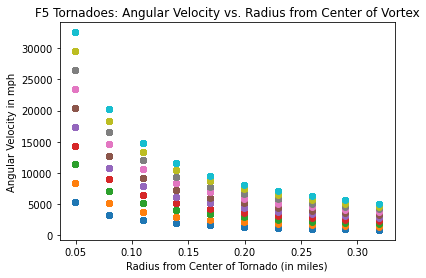

In [ ]:
plt.figure()
for j in rf5:
    for i in range(10):
        plt.scatter(f5rad_values[i], f5_df[i])
plt.xlabel('Radius from Center of Tornado (in miles)')
plt.ylabel('Angular Velocity in mph')
plt.title('F5 Tornadoes: Angular Velocity vs. Radius from Center of Vortex')
plt.show()

### F5 Probability Density Function

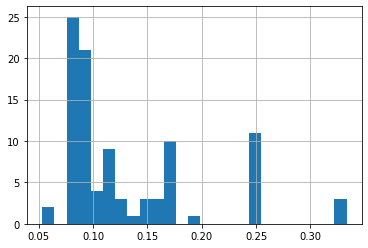

In [ ]:
f5rad_mi = f5mag['TOR_WIDTH']/5280
f5rad_mi.hist(bins=25)

In [ ]:
f5rad_count = pd.cut(f5rad_mi, bins=10, include_lowest = True, ordered = True).value_counts()
f5rad_count = f5rad_count.reindex(f5rad_count.index.categories)
f5rad_count.reindex(f5rad_count.index)

(0.0518, 0.0811]    11
(0.0811, 0.109]     41
(0.109, 0.137]      13
(0.137, 0.165]       6
(0.165, 0.193]      11
(0.193, 0.221]       0
(0.221, 0.249]       0
(0.249, 0.277]      11
(0.277, 0.305]       0
(0.305, 0.333]       3
Name: TOR_WIDTH, dtype: int64

In [ ]:
f5rad_prob = f5rad_count/96
f5rad_prob

(0.0518, 0.0811]    0.114583
(0.0811, 0.109]     0.427083
(0.109, 0.137]      0.135417
(0.137, 0.165]      0.062500
(0.165, 0.193]      0.114583
(0.193, 0.221]      0.000000
(0.221, 0.249]      0.000000
(0.249, 0.277]      0.114583
(0.277, 0.305]      0.000000
(0.305, 0.333]      0.031250
Name: TOR_WIDTH, dtype: float64

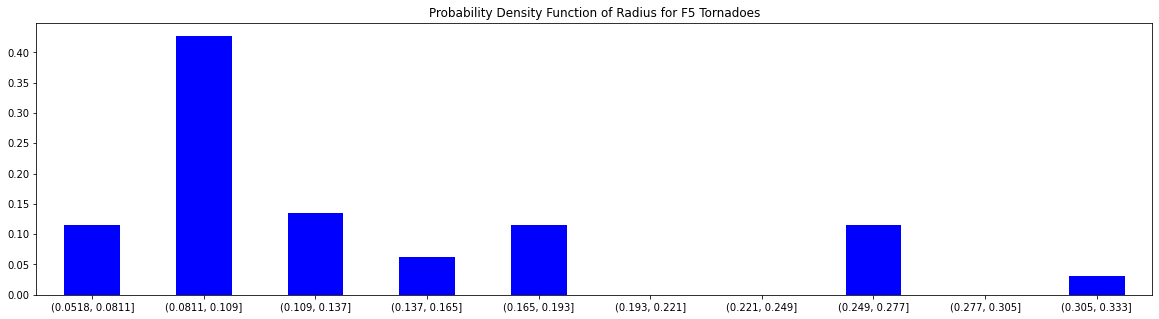

In [ ]:
ax5 = f5rad_prob.plot.bar(rot=0, color="b", figsize=(20,5))
plt.title('Probability Density Function of Radius for F5 Tornadoes')
plt.show()

In [ ]:
# calculate parameters
sample_mean5 = np.mean(f5rad_prob)
sample_std5 = np.std(f5rad_prob)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))

Mean=0.100, Standard Deviation=0.221


In [ ]:
f5_lob=(0.0518, 0.0811, 0.109, 0.137, 0.165, 0.193, 0.221, 0.249, 0.277, 0.305)
f5_upb=(0.0811, 0.109, 0.137, 0.165, 0.193, 0.221, 0.249, 0.277, 0.305, 0.333)

f5range = []
f5rad_sim = []

for x in range(50):
  i = np.random.choice(np.arange(0,10), p=[0.114583, 0.427083, 0.135417, 0.062500, 0.114583, 0.000000, 0.000000, 0.114583, 0.000000, 0.031251])
  f5rad_sim.append(random.uniform(f5_lob[i], f5_upb[i]))

f5rad_sim = np.array(f5rad_sim)
print(f5rad_sim)

[0.31606559 0.09849489 0.12505122 0.11142975 0.08829745 0.26856731
 0.05327659 0.08387731 0.15933143 0.17907521 0.08111863 0.06413873
 0.09213753 0.26421436 0.1438582  0.09346679 0.11813235 0.09302905
 0.05206381 0.12045713 0.07339302 0.08540317 0.1183426  0.09872694
 0.26080858 0.15417041 0.10496879 0.18249205 0.18956994 0.10889437
 0.07926722 0.27271214 0.08866877 0.17454804 0.1067643  0.06828345
 0.10587273 0.13805765 0.05525552 0.10204237 0.08566622 0.16911068
 0.09310084 0.27409139 0.10687616 0.13641737 0.07483696 0.16295114
 0.10295488 0.08446528]


### F5 Probailistic Simulation

In [ ]:
#velocity ranges for F5

f5_sim = []

for i in np.arange(261,1760,1.06):
    f5_sim.append(i)
    
f5_sim = np.array(f5_sim)

print(f5_sim)

[ 261.    262.06  263.12 ... 1757.72 1758.78 1759.84]


In [ ]:
#calculate the angular velocity

f5_simarray = []

for i in f5rad_sim:
    loop_list = []
    for j in f5_sim:
        x = j/i
        loop_list.append(x)
    f5_simarray.append(loop_list)
    
print(f5_simarray)

f5_simdf = pd.DataFrame(f5_simarray)

[[825.7779718238615, 829.13170611556, 832.4854404072584, 835.8391746989569, 839.1929089906553, 842.5466432823538, 845.9003775740522, 849.2541118657506, 852.6078461574491, 855.9615804491475, 859.315314740846, 862.6690490325444, 866.0227833242428, 869.3765176159413, 872.7302519076397, 876.0839861993383, 879.4377204910367, 882.7914547827352, 886.1451890744336, 889.498923366132, 892.8526576578305, 896.2063919495289, 899.5601262412274, 902.9138605329258, 906.2675948246242, 909.6213291163227, 912.9750634080211, 916.3287976997196, 919.682531991418, 923.0362662831164, 926.390000574815, 929.7437348665134, 933.0974691582119, 936.4512034499103, 939.8049377416088, 943.1586720333072, 946.5124063250056, 949.8661406167041, 953.2198749084025, 956.573609200101, 959.9273434917994, 963.2810777834978, 966.6348120751964, 969.9885463668948, 973.3422806585933, 976.6960149502917, 980.0497492419902, 983.4034835336886, 986.757217825387, 990.1109521170855, 993.4646864087839, 996.8184207004824, 1000.1721549921808

In [ ]:
f5rad_simvalues = []

for i in range(50):
    rad_list = []
    for j in range(50):
        rad_list.append(f5rad_sim[j])
    f5rad_simvalues.append(rad_list)
    
print(f5rad_simvalues)

[[0.3160655877312156, 0.0984948874009826, 0.1250512214282709, 0.1114297490992013, 0.08829744967182335, 0.26856730742231893, 0.05327658922247226, 0.0838773108818101, 0.1593314253677594, 0.17907521465663234, 0.08111862741280985, 0.06413873009503679, 0.0921375284403763, 0.2642143607959919, 0.14385819833243935, 0.09346678683220641, 0.1181323469250441, 0.09302904790887843, 0.0520638060572062, 0.12045712858106924, 0.07339301638631057, 0.08540317326132514, 0.11834259518298297, 0.0987269395354804, 0.26080857869241125, 0.15417040995933567, 0.10496878520108424, 0.18249205002248642, 0.1895699442406006, 0.10889436538193738, 0.07926721690661766, 0.27271214350373735, 0.08866876531564484, 0.1745480354481876, 0.10676430312016397, 0.06828345159414598, 0.10587272842784301, 0.13805764753550576, 0.055255522886636314, 0.10204236524380984, 0.08566621901260314, 0.16911068040472554, 0.09310084119732355, 0.2740913922716286, 0.10687615811587602, 0.13641737046971358, 0.07483695661070688, 0.16295113617244705, 0.1

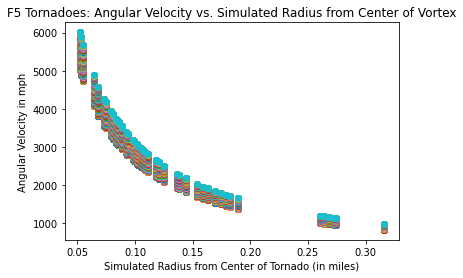

In [ ]:
plt.figure()
for j in f5rad_sim:
    for i in range(50):
        plt.scatter(f5rad_simvalues[i], f5_simdf[i])
plt.xlabel('Simulated Radius from Center of Tornado (in miles)')
plt.ylabel('Angular Velocity in mph')
plt.title('F5 Tornadoes: Angular Velocity vs. Simulated Radius from Center of Vortex')
plt.show()

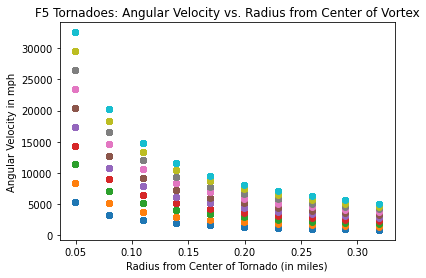

In [ ]:
plt.figure()
for j in rf5:
    for i in range(10):
        plt.scatter(f5rad_values[i], f5_df[i])
plt.xlabel('Radius from Center of Tornado (in miles)')
plt.ylabel('Angular Velocity in mph')
plt.title('F5 Tornadoes: Angular Velocity vs. Radius from Center of Vortex')
plt.show()

# Jesus' Section Pt. 2

## Predicting Economic Losses

### Data Preparation

In [ ]:
# Dataframe to be used for the analysis
pred_df = df[['wid','len','fat','inj','mag','loss']].dropna()

In [ ]:
# Feature matrix

X_new = pred_df.drop(columns=["loss"], axis=1)

# Standarizing numerical feautures
num = ['wid','len','fat','inj']

sc = StandardScaler()

standard_X_new = pd.DataFrame(sc.fit_transform(X_new[num]), columns=num)

# Dummifying categorical features
categorical = ['mag']


X_new = pd.concat([standard_X_new, X_new[categorical]], axis=1)
X_new = pd.get_dummies(X_new, prefix=['Magnitude'], columns=categorical)

print('pred_df Shape:',pred_df.shape)
X_new = X_new.dropna()

print('X_new Shape:', X_new.shape)


pred_df Shape: (24683, 6)
X_new Shape: (24683, 10)


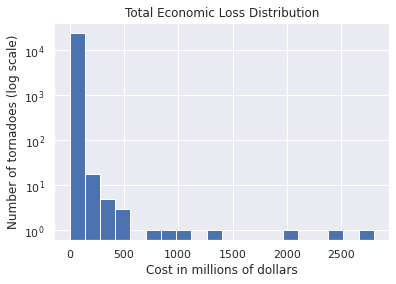

In [ ]:
# Plotting Histogram

y_new = df['loss'].dropna()
plt.figure(figsize=(6,4))
plt.title("Total Economic Loss Distribution")
plt.ylabel("Number of tornadoes (log scale)")
plt.xlabel("Cost in millions of dollars")
y_new.hist(bins=20, log=True)
plt.show()

In [ ]:
# Statistical Summary

y_new.describe()

count    24683.000000
mean         1.287158
std         31.537972
min          0.000000
25%          0.000000
50%          0.000000
75%          0.050000
max       2800.100000
Name: loss, dtype: float64

### Creating the Model

In [ ]:
# Training and Testing
Xnewtrain1, Xnewtest1, ynewtrain1, ynewtest1 = train_test_split(X_new, y_new, test_size=0.3,random_state=3)

In [ ]:
# Setting up the baseline
# Calculating the root squared mean deviation and root squared
RMSD_baseline = np.sqrt(mean_squared_error(ynewtest1, np.tile(ynewtest1.median(), len(ynewtest1))))
R2_baseline = r2_score(ynewtest1, np.tile(ynewtest1.median(), len(ynewtest1)))

print("Baseline RMSE:\t", RMSD_baseline)
print("Baseline R2:\t", R2_baseline)

Baseline RMSE:	 22.3109329267541
Baseline R2:	 -0.003842043891185032


**Linear Regression**

In [ ]:
linear_reg = LinearRegression()

linear_reg.fit(Xnewtrain1, ynewtrain1)

y_hat = linear_reg.predict(Xnewtest1)


In [ ]:
rmse_linear_reg = np.sqrt(mean_squared_error(ynewtest1, y_hat))
R2_linear_reg = r2_score(ynewtest1, y_hat)

print("Linear Reg 1 - RMSE:\t\t\t", rmse_linear_reg)
print("Linear Reg 1 - R2:\t\t\t", R2_linear_reg)

Linear Reg 1 - crossvalidated R2:	 -0.2589463732252448
Linear Reg 1 - RMSE:			 18.495819925158806
Linear Reg 1 - R2:			 0.3101143729178887


In [ ]:
# testing normality of errors and independence of error

resid = ynewtest1 - y_hat
resid = pd.Series(resid)
plt.scatter(y_hat, resid)
plt.hlines(0,5,800)
plt.show()

In [ ]:
### Linera Regression: Lasso Regularization

In [ ]:
# random_state = The seed of the pseudo random number generator that selects a 
# random feature to update. 

lasso = linear_model.Lasso(random_state=3).fit(Xnewtrain1, ynewtrain1)

yhat_lasso = lasso.predict(Xnewtest1)

rmse_lasso = np.sqrt(mean_squared_error(ynewtest1, yhat_lasso))

r2_lasso = r2_score(ynewtest1, yhat_lasso)

print("Linear Reg 2 - RMSE:\t\t\t", rmse_lasso)
print("Linear Reg 2 - R2:\t\t\t", r2_lasso)

In [ ]:
# testing normality of errors

resid1 = ynewtest1 - yhat_lasso
resid1 = pd.Series(resid1)
plt.scatter(yhat_lasso, resid1)
plt.hlines(0,5,800)
plt.show()